In [1]:
#imstall missingno
!pip install missingno

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-darkgrid")
import missingno as msno 
import warnings
warnings.filterwarnings("ignore")

# Data Ingestion

In [3]:
df = pd.read_csv('vehicles.csv')
df.head()

barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0  14.167143         0.0        0.0        0.0      19      0.0        0   
1  27.046364         0.0        0.0        0.0       9      0.0        0   
2  11.018889         0.0        0.0        0.0      23      0.0        0   
3  27.046364         0.0        0.0        0.0      10      0.0        0   
4  15.658421         0.0        0.0        0.0      17      0.0        0   

   cityA08U  cityCD  cityE  ...  mfrCode  c240Dscr  charge240b  c240bDscr  \
0       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
1       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
2       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
3       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
4       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   

                      createdOn                    modifiedOn  startStop  \
0  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
1  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
2  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
3  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
4  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   

   phevCity  phevHwy  phevComb  
0         0        0         0  
1         0        0         0  
2         0        0         0  
3         0        0         0  
4         0        0         0  

[5 rows x 83 columns]

In [4]:
emission = pd.read_csv('emissions.csv')
emission.head()

efid     id  salesArea  score  scoreAlt  smartwayScore standard  \
0  4HNXV03.2MJE  19332          3    1.0      -1.0             -1       B9   
1  4HNXV03.2MJE  19332          7    1.0      -1.0             -1       L1   
2  4HNXV03.2MJE  19333          3    1.0      -1.0             -1       B9   
3  4HNXV03.2MJE  19333          7    1.0      -1.0             -1       L1   
4  4ADXV01.8346  19334          3    1.0      -1.0             -1       B9   

  stdText  
0   BIN 9  
1     LEV  
2   BIN 9  
3     LEV  
4   BIN 9

# Data Preparation

In [5]:
emission.shape

(47527, 8)

In [6]:
df.shape

(45992, 83)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45992 entries, 0 to 45991
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        45992 non-null  float64
 1   barrelsA08       45992 non-null  float64
 2   charge120        45992 non-null  float64
 3   charge240        45992 non-null  float64
 4   city08           45992 non-null  int64  
 5   city08U          45992 non-null  float64
 6   cityA08          45992 non-null  int64  
 7   cityA08U         45992 non-null  float64
 8   cityCD           45992 non-null  float64
 9   cityE            45992 non-null  float64
 10  cityUF           45992 non-null  float64
 11  co2              45992 non-null  int64  
 12  co2A             45992 non-null  int64  
 13  co2TailpipeAGpm  45992 non-null  float64
 14  co2TailpipeGpm   45992 non-null  float64
 15  comb08           45992 non-null  int64  
 16  comb08U          45992 non-null  float64
 17  combA08     

In [8]:
emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47527 entries, 0 to 47526
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   efid           47527 non-null  object 
 1   id             47527 non-null  int64  
 2   salesArea      47527 non-null  int64  
 3   score          47527 non-null  float64
 4   scoreAlt       47527 non-null  float64
 5   smartwayScore  47527 non-null  int64  
 6   standard       47527 non-null  object 
 7   stdText        47513 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.9+ MB


In [9]:
# merging emission with vehicle file using the column they have in common, id
data = df.merge(emission, on=['id'])
data.head()

barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0  16.528333         0.0        0.0        0.0      16      0.0        0   
1  16.528333         0.0        0.0        0.0      16      0.0        0   
2  16.528333         0.0        0.0        0.0      16      0.0        0   
3  16.528333         0.0        0.0        0.0      16      0.0        0   
4  14.167143         0.0        0.0        0.0      18      0.0        0   

   cityA08U  cityCD  cityE  ...  phevCity  phevHwy  phevComb          efid  \
0       0.0     0.0    0.0  ...         0        0         0  4HNXV03.2MJE   
1       0.0     0.0    0.0  ...         0        0         0  4HNXV03.2MJE   
2       0.0     0.0    0.0  ...         0        0         0  4HNXV03.2MJE   
3       0.0     0.0    0.0  ...         0        0         0  4HNXV03.2MJE   
4       0.0     0.0    0.0  ...         0        0         0  4ADXV01.8346   

   salesArea  score  scoreAlt  smartwayScore  standard  stdText  
0          3    1.0      -1.0             -1        B9    BIN 9  
1          7    1.0      -1.0             -1        L1      LEV  
2          3    1.0      -1.0             -1        B9    BIN 9  
3          7    1.0      -1.0             -1        L1      LEV  
4          3    1.0      -1.0             -1        B9    BIN 9  

[5 rows x 90 columns]

In [10]:
data.shape

(47393, 90)

In [11]:
# checking for duplicates
data.duplicated().value_counts()

False    47393
dtype: int64

**Missing value treatment**

<AxesSubplot:>

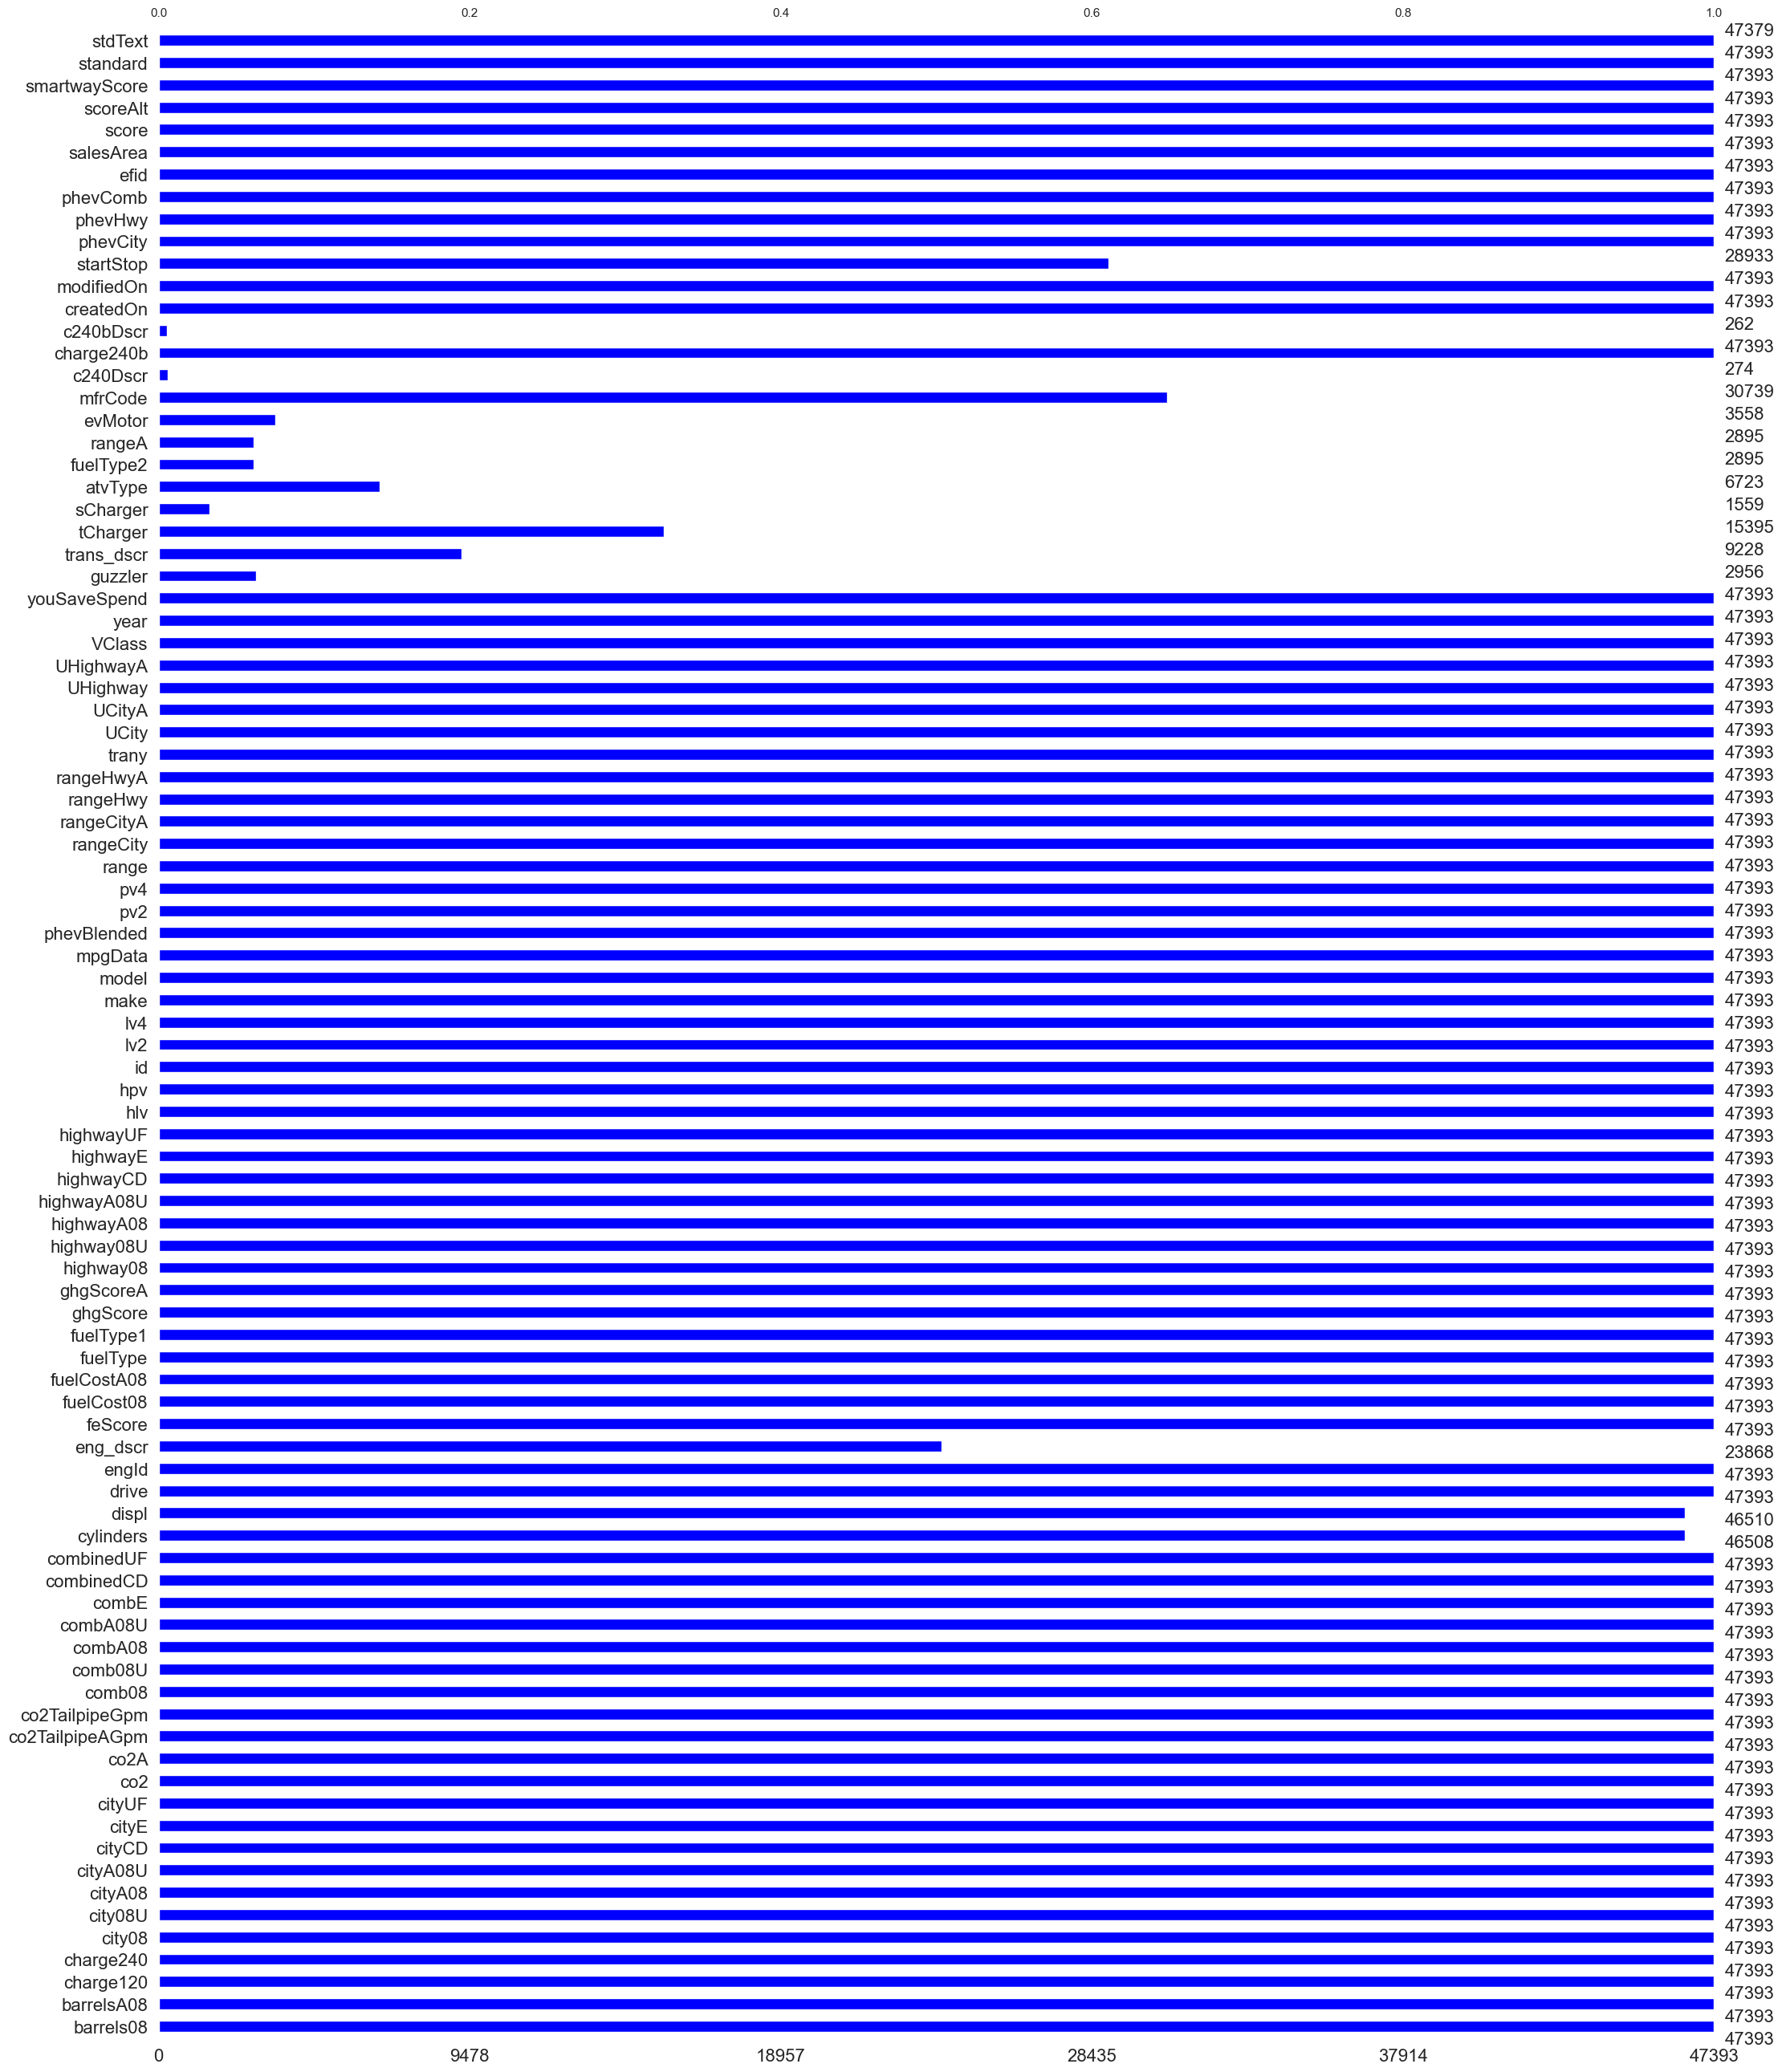

In [12]:
# Visualize the missing values using msno bar
sns.set(style = 'ticks')
msno.bar(data, color = "blue")
# This plot helps us to visualize the amount of missing data in every attributes for the train data set

In [13]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [14]:
missing_zero_values_table(data)

Your selected dataframe has 90 columns and 47393 Rows.
There are 16 columns that have missing values.


Zero Values  Missing Values  % of Total Values  \
c240bDscr             0           47131               99.4   
c240Dscr              0           47119               99.4   
sCharger              0           45834               96.7   
fuelType2             0           44498               93.9   
rangeA                0           44498               93.9   
guzzler               0           44437               93.8   
evMotor               0           43835               92.5   
atvType               0           40670               85.8   
trans_dscr            0           38165               80.5   
tCharger              0           31998               67.5   
eng_dscr              0           23525               49.6   
startStop             0           18460               39.0   
mfrCode               0           16654               35.1   
cylinders             0             885                1.9   
displ                 2             883                1.9   
stdText               0              14                0.0   

            Total Zero Missing Values  % Total Zero Missing Values Data Type  
c240bDscr                       47131                         99.4    object  
c240Dscr                        47119                         99.4    object  
sCharger                        45834                         96.7    object  
fuelType2                       44498                         93.9    object  
rangeA                          44498                         93.9    object  
guzzler                         44437                         93.8    object  
evMotor                         43835                         92.5    object  
atvType                         40670                         85.8    object  
trans_dscr                      38165                         80.5    object  
tCharger                        31998                         67.5    object  
eng_dscr                        23525                         49.6    object  
startStop                       18460                         39.0    object  
mfrCode                         16654                         35.1    object  
cylinders                         885                          1.9   float64  
displ                             885                          1.9   float64  
stdText                            14                          0.0    object

In [15]:
# Dropping columns with more than 20% missing values 
missing_data = data.isnull().sum()/len(data)
data = data.drop(columns=missing_data[missing_data>0.2].index)
data.head()

barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0  16.528333         0.0        0.0        0.0      16      0.0        0   
1  16.528333         0.0        0.0        0.0      16      0.0        0   
2  16.528333         0.0        0.0        0.0      16      0.0        0   
3  16.528333         0.0        0.0        0.0      16      0.0        0   
4  14.167143         0.0        0.0        0.0      18      0.0        0   

   cityA08U  cityCD  cityE  ...  phevCity  phevHwy  phevComb          efid  \
0       0.0     0.0    0.0  ...         0        0         0  4HNXV03.2MJE   
1       0.0     0.0    0.0  ...         0        0         0  4HNXV03.2MJE   
2       0.0     0.0    0.0  ...         0        0         0  4HNXV03.2MJE   
3       0.0     0.0    0.0  ...         0        0         0  4HNXV03.2MJE   
4       0.0     0.0    0.0  ...         0        0         0  4ADXV01.8346   

   salesArea  score  scoreAlt  smartwayScore  standard  stdText  
0          3    1.0      -1.0             -1        B9    BIN 9  
1          7    1.0      -1.0             -1        L1      LEV  
2          3    1.0      -1.0             -1        B9    BIN 9  
3          7    1.0      -1.0             -1        L1      LEV  
4          3    1.0      -1.0             -1        B9    BIN 9  

[5 rows x 77 columns]

In [16]:
data.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'feScore', 'fuelCost08', 'fuelCostA08',
       'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA', 'highway08',
       'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD', 'highwayE',
       'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make', 'model',
       'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'charge240b',
       'createdOn', 'modifiedOn', 'phevCity', 'phevHwy', 'phevComb', 'efid',
       'salesArea', 'score', 'scoreAlt', 'smartwayScore', 'standard',
       'stdText'],
      dtype='object')

**Feature Selection**

**Target and Predictor variables explanation:** 

 
cylinders - engine cylinders

displ - engine displacement in liters

drive - drive axle type

engId - EPA model type index

feScore - EPA Fuel Economy Score

fuelCost08 - annual fuel cost

fuelType - fuel type with fuelType1 and fuelType2 (if applicable)

trany - transmission

VClass - EPA vehicle size class

make - manufacturer

model - model name

This project involves prediction of fuel economy and emission, and from the documentation of this data set (https://www.fueleconomy.gov/feg/ws/index.shtml#fuelType1), there are two fuel types for each prediction, fuel type1 and fuel type2, however fuel type2 was dropped because it has over 93% missing values. So I'll be working with features related with fuel type 1 and I woulde be using the fuel type input variale because it is a combination of both fuel type one and two.

There are two co2 as target features, co2 and co2TailpipeGpm, from the documentation, they have same meaning but they actually have different data inputs, so I would view them individually and use just one.

In [17]:
data['co2TailpipeGpm'].value_counts()

423.190476    2011
444.350000    1902
467.736842    1770
493.722222    1611
403.954545    1517
              ... 
707.000000       1
391.538462       1
682.000000       1
565.555556       1
130.000000       1
Name: co2TailpipeGpm, Length: 657, dtype: int64

In [18]:
data['co2'].value_counts()

-1      18849
 0        885
 407      187
 415      180
 387      178
        ...  
 161        2
 219        2
 130        1
 682        1
 707        1
Name: co2, Length: 602, dtype: int64

It can be seen that co2 has -1 data inputs. 

The amount of carbon dioxide that is emitted into the atmosphere by a vehicle's combustion of fossil fuels is measured by its CO2 emissions, which technically cannot be negative.

However, a vehicle could have "negative emissions" in the sense that it uses carbon capture and storage (CCS) technology to lower the quantity of CO2 in the atmosphere.

There aren't any vehicles on the market right now that use carbon capture and storage (CCS) technology to achieve negative emissions.

There for I will not be using this particular co2 feature in this project, I'd use the co2tailpipe as my target co2.

In [19]:
targets = data[['fuelCost08','co2TailpipeGpm']]
targets

fuelCost08  co2TailpipeGpm
0            3500      493.722222
1            3500      493.722222
2            3500      493.722222
3            3500      493.722222
4            3000      423.190476
...           ...             ...
47388        1100        0.000000
47389        1000        0.000000
47390        1000        0.000000
47391        1050        0.000000
47392        1050        0.000000

[47393 rows x 2 columns]

# FOCUSING ON TARGET fuelCost08

In [20]:
# selecting relevant features from the whole dataset
new_data = data[['cylinders','displ', 'drive', 'efid', 'engId', 'feScore','fuelType', 
        'make', 'model', 'trany', 'VClass', 'year', 'fuelCost08']]

In [21]:
new_data.head()

cylinders  displ              drive          efid  engId  feScore fuelType  \
0        6.0    3.0   Rear-Wheel Drive  4HNXV03.2MJE      0       -1  Premium   
1        6.0    3.0   Rear-Wheel Drive  4HNXV03.2MJE      0       -1  Premium   
2        6.0    3.2   Rear-Wheel Drive  4HNXV03.2MJE      0       -1  Premium   
3        6.0    3.2   Rear-Wheel Drive  4HNXV03.2MJE      0       -1  Premium   
4        4.0    1.8  Front-Wheel Drive  4ADXV01.8346      0       -1  Premium   

    make        model           trany       VClass  year  fuelCost08  
0  Acura          NSX  Automatic (S4)  Two Seaters  2004        3500  
1  Acura          NSX  Automatic (S4)  Two Seaters  2004        3500  
2  Acura          NSX    Manual 6-spd  Two Seaters  2004        3500  
3  Acura          NSX    Manual 6-spd  Two Seaters  2004        3500  
4   Audi  TT Roadster  Automatic (S6)  Two Seaters  2004        3000

In [22]:
#checking for missing values after feature selection
new_data.isnull().sum()


cylinders     885
displ         883
drive           0
efid            0
engId           0
feScore         0
fuelType        0
make            0
model           0
trany           0
VClass          0
year            0
fuelCost08      0
dtype: int64

**Treating missing values after feature selection**

In [23]:
# replacing missing values in 'displ' column with the mean ( choosing the mean because its inputs are decimals and given 
#that the mean is likely to give a decimal number, it'll fit into the column data)

mean_displ = new_data['displ'].mean()
new_data['displ'].replace(np.nan, mean_displ, inplace = True)

In [24]:
# replacing missing values in 'cylinders' column with the median ( choosing the median because its inputs are intergers and 
#given that the mean is likely to give a decimal number, it wont fit into the column data)

med_cyl = new_data['cylinders'].median()
new_data['cylinders'].replace(np.nan, med_cyl, inplace = True)

In [25]:
#checking for missing values after treatment
new_data.isnull().sum()


cylinders     0
displ         0
drive         0
efid          0
engId         0
feScore       0
fuelType      0
make          0
model         0
trany         0
VClass        0
year          0
fuelCost08    0
dtype: int64

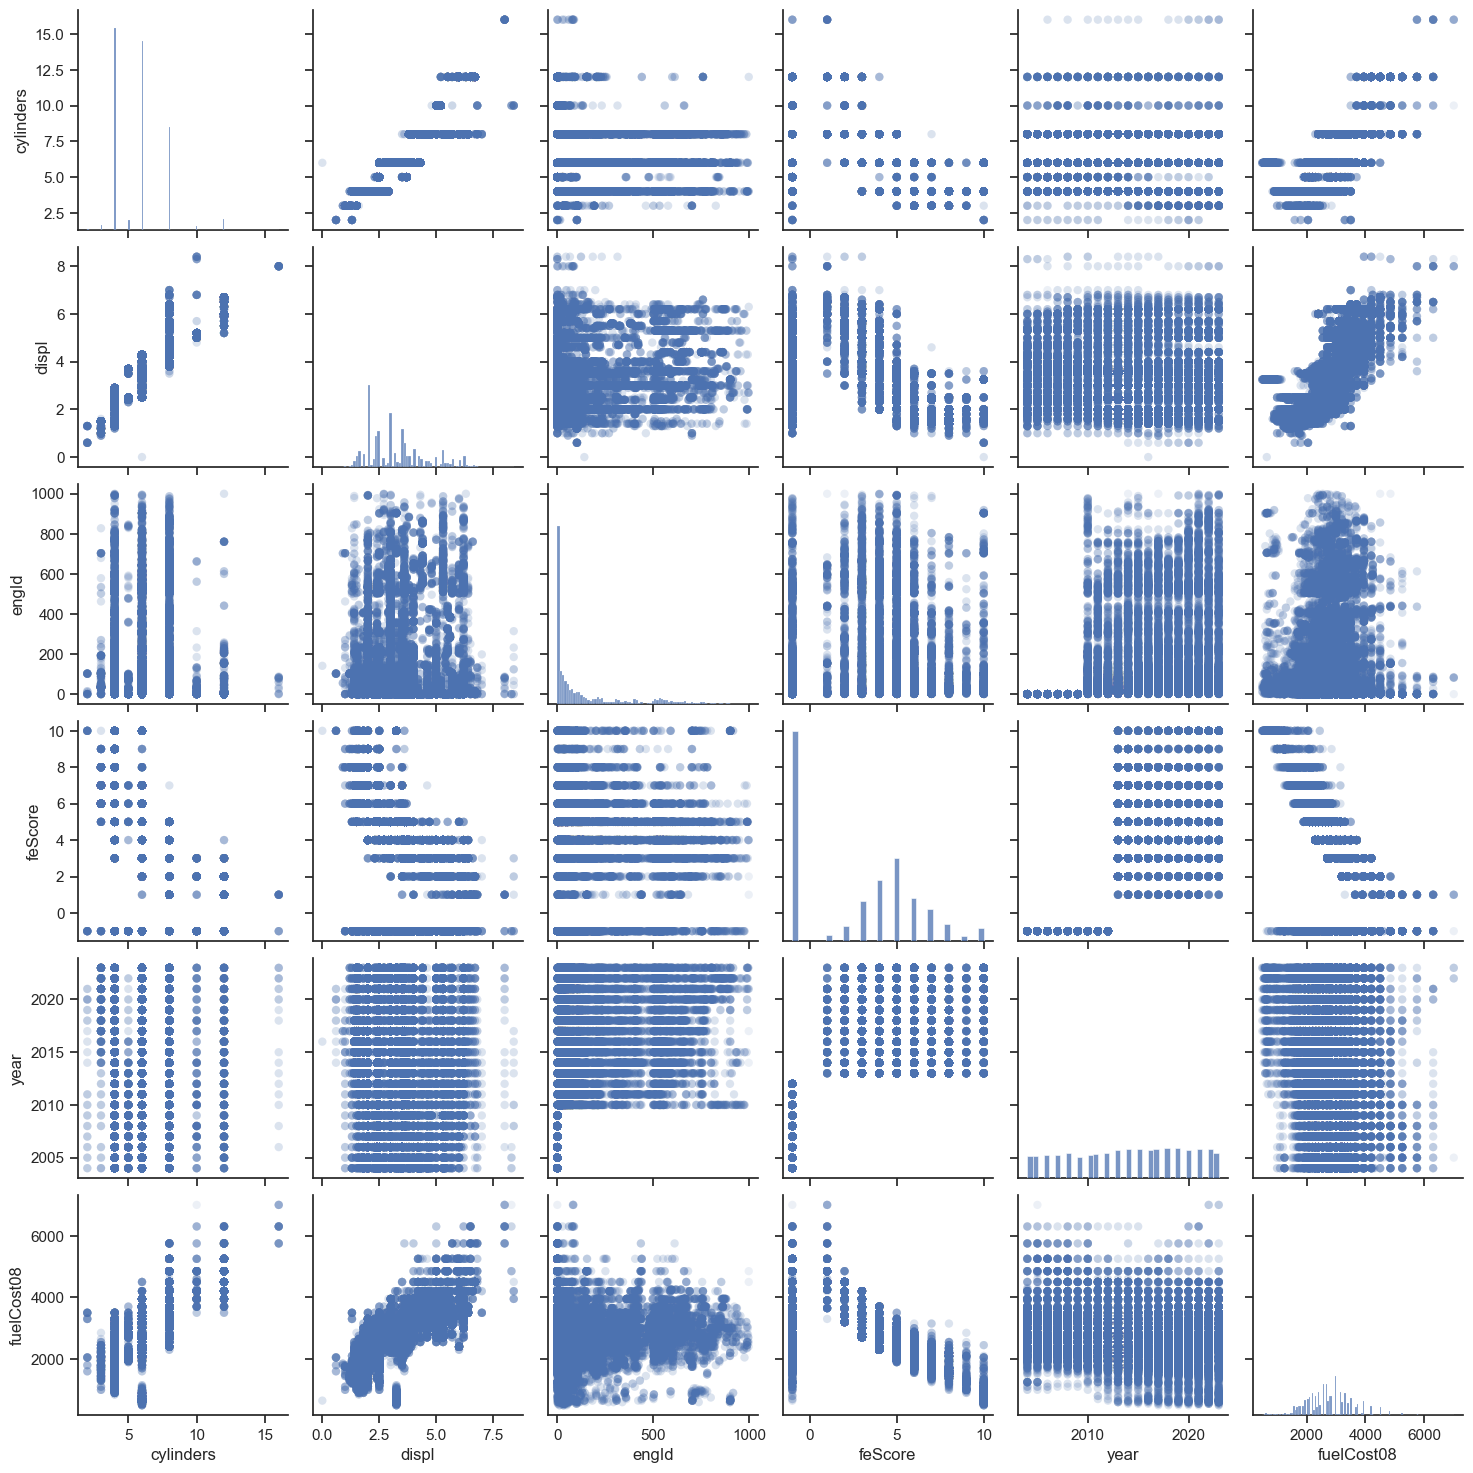

In [26]:
# Create a matrix scatterplot 
sns.pairplot(new_data, plot_kws = dict(alpha=.1, edgecolor = 'none')) 

# Exploratory Data Analysis

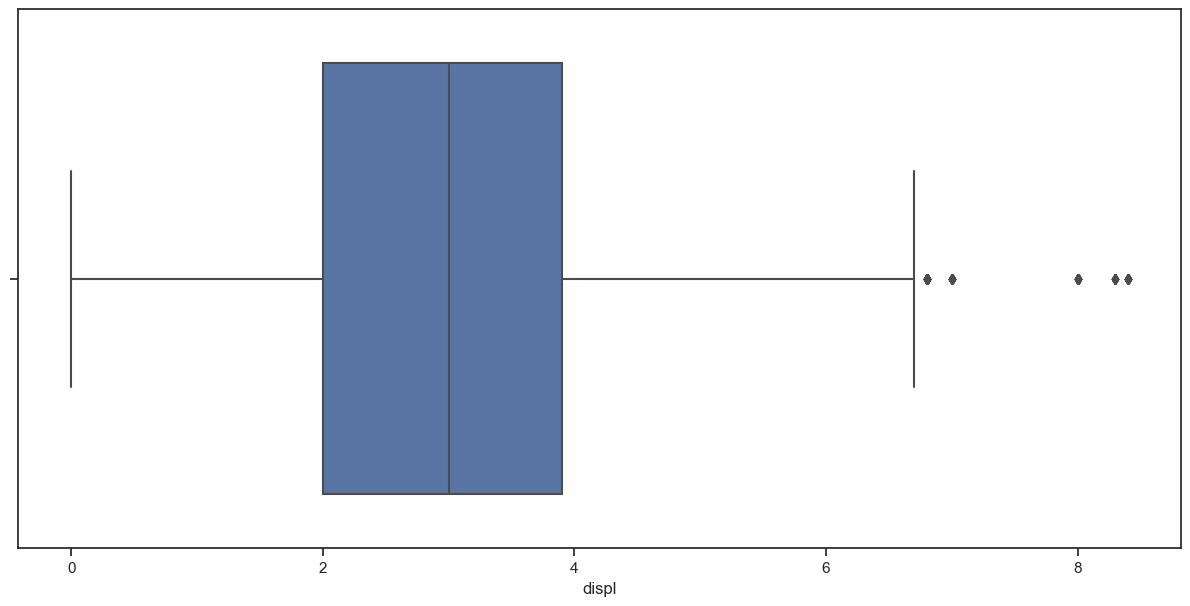

In [27]:
#creating boxplot to get more details on outliers
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =new_data['displ'])

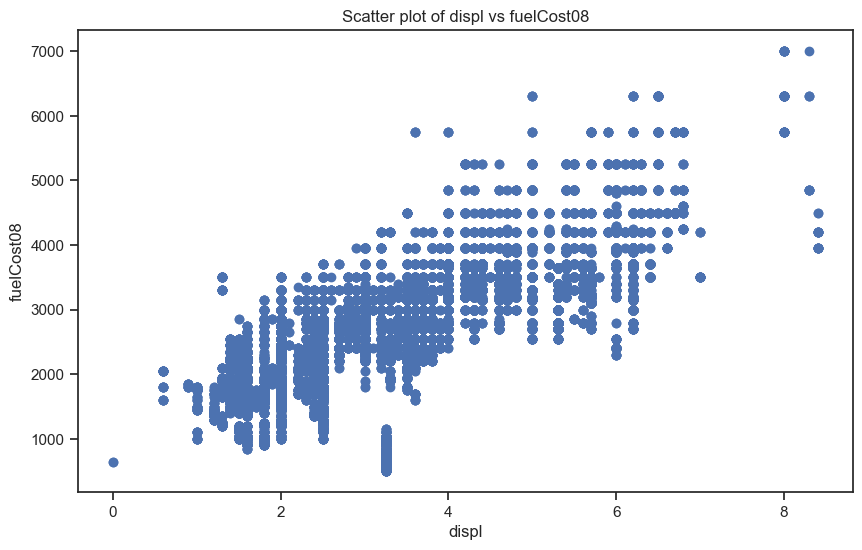

In [28]:
#using scatter plot (crossplot) to visualize better
plt.figure(figsize=(10, 6))
plt.scatter(x=new_data['displ'], y=new_data['fuelCost08'])
plt.title('Scatter plot of displ vs fuelCost08')
plt.xlabel('displ')
plt.ylabel('fuelCost08')
plt.show()


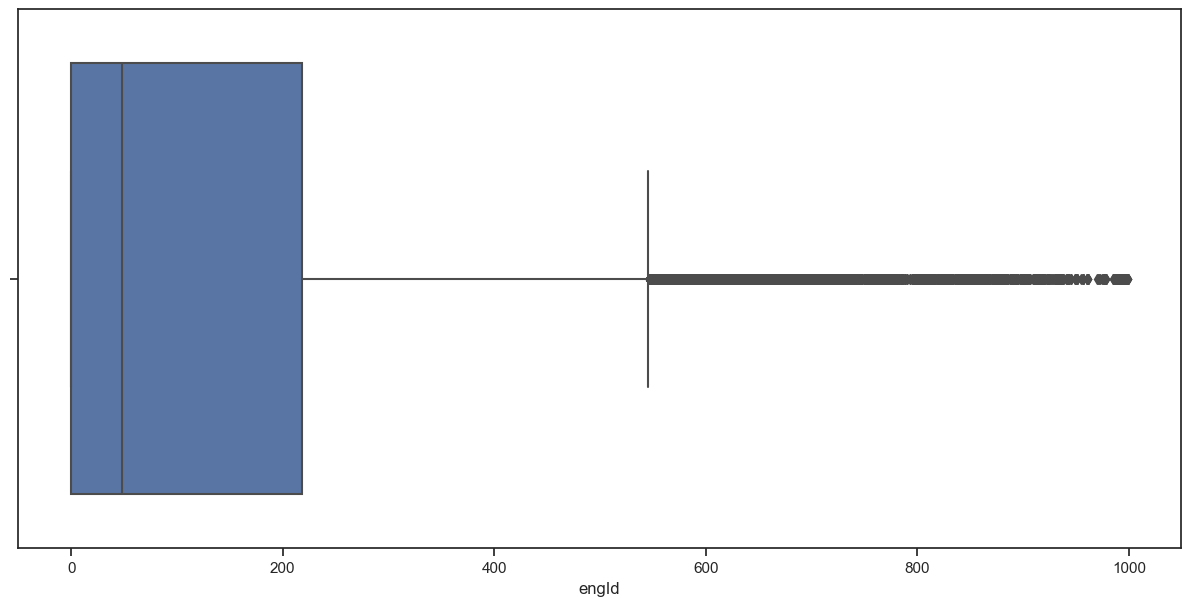

In [29]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =new_data['engId'])

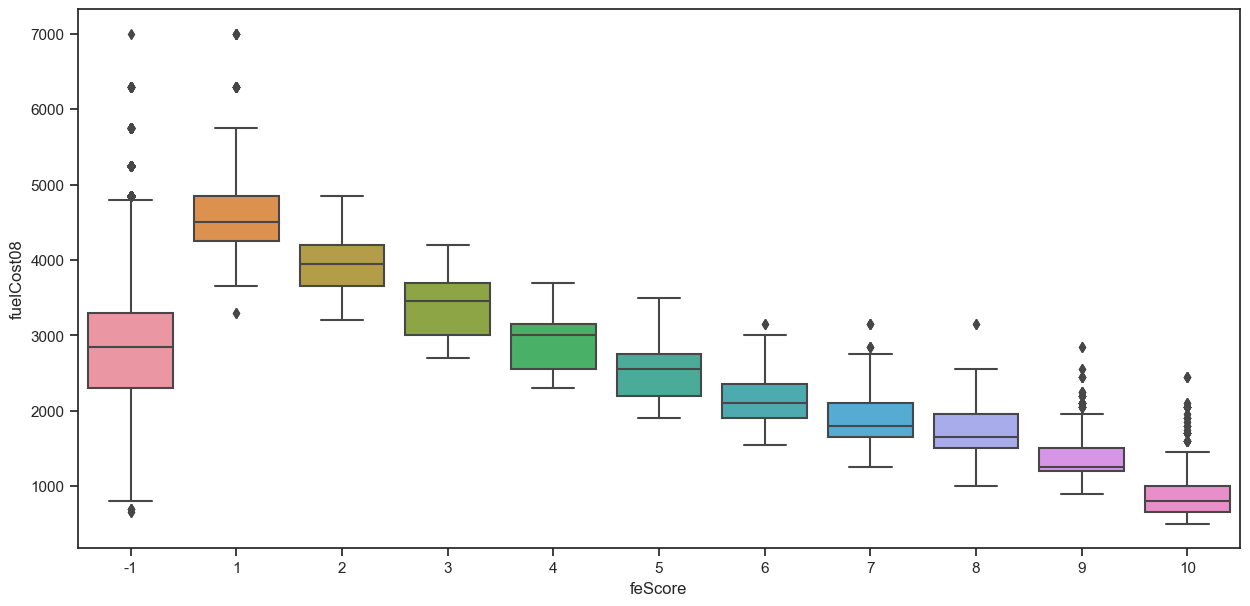

In [30]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =new_data['feScore'], y =new_data['fuelCost08'])

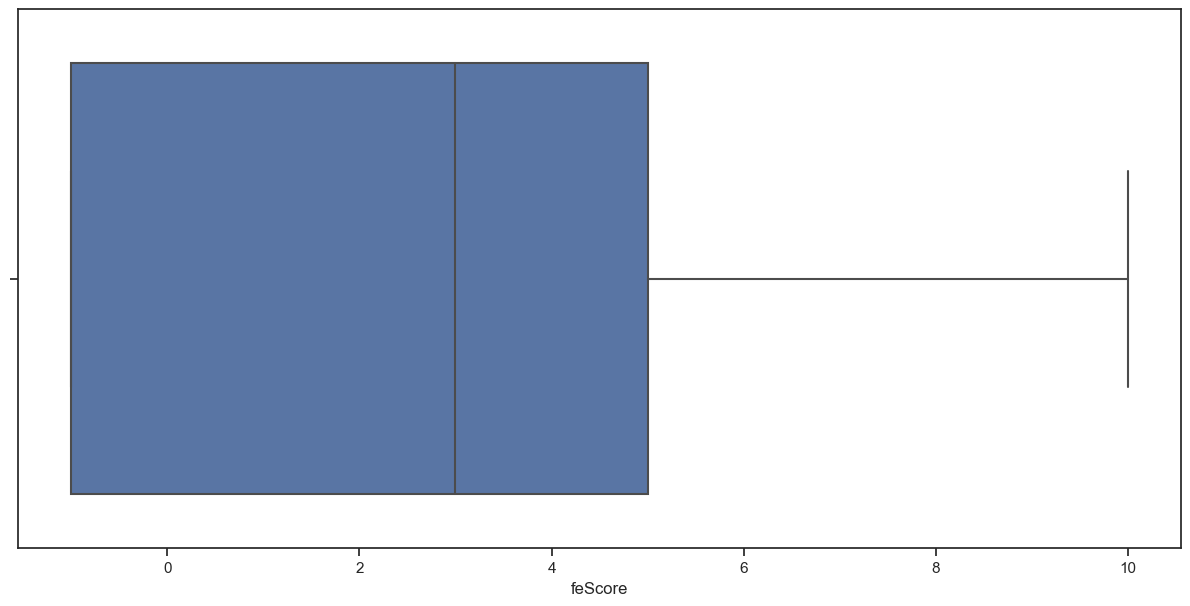

In [31]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =new_data['feScore'])

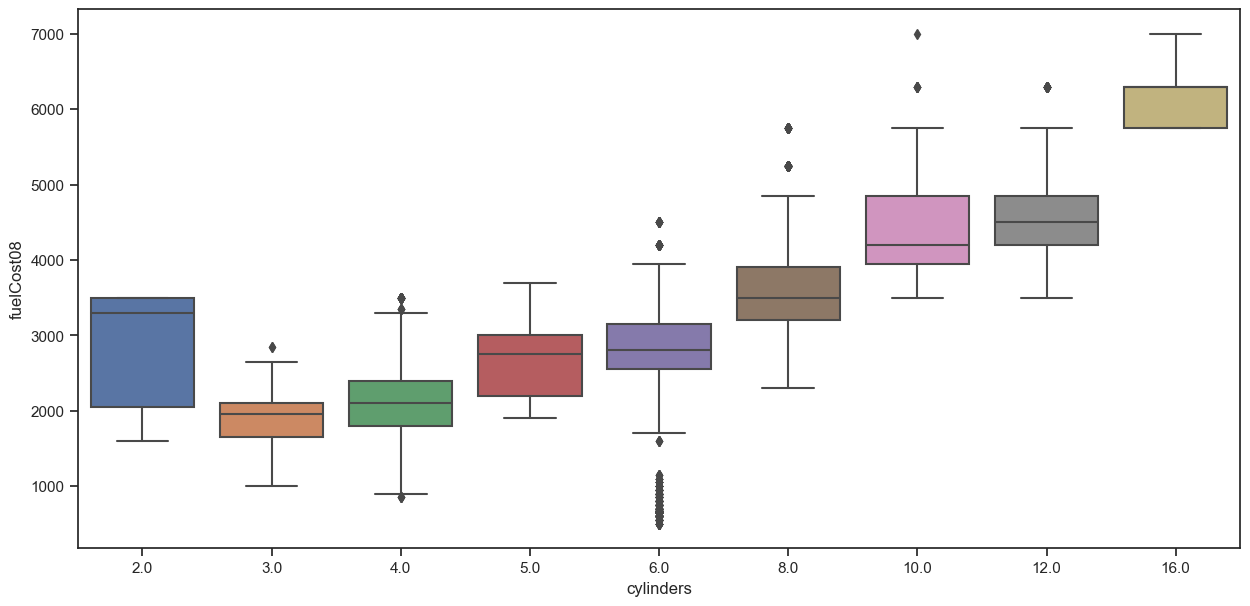

In [32]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =new_data['cylinders'], y =new_data['fuelCost08'])

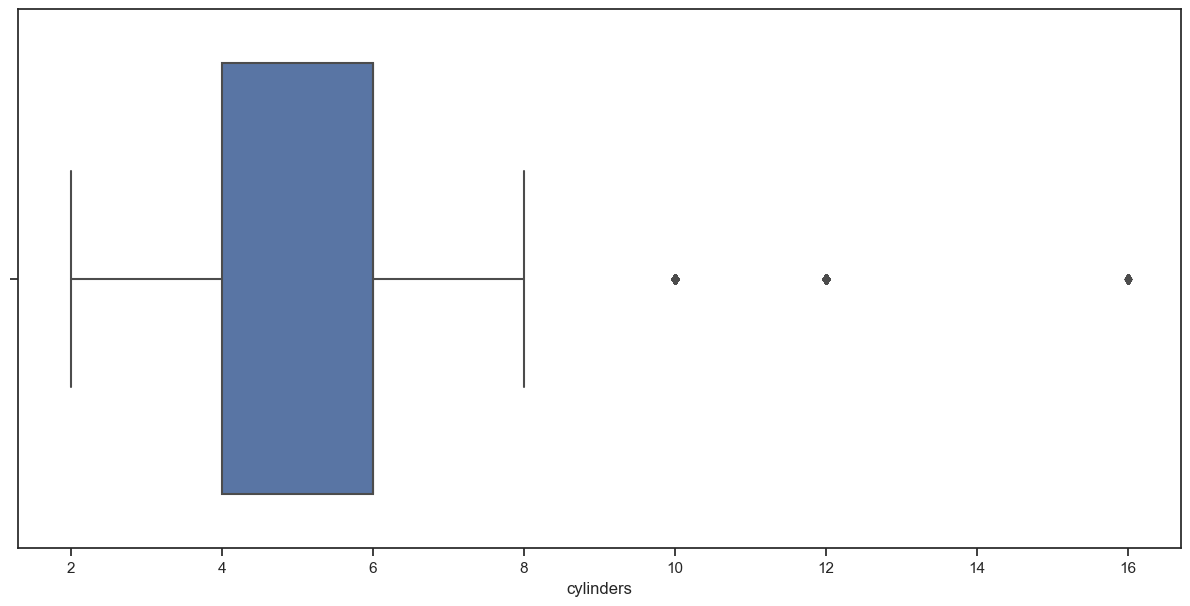

In [33]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =new_data['cylinders'])

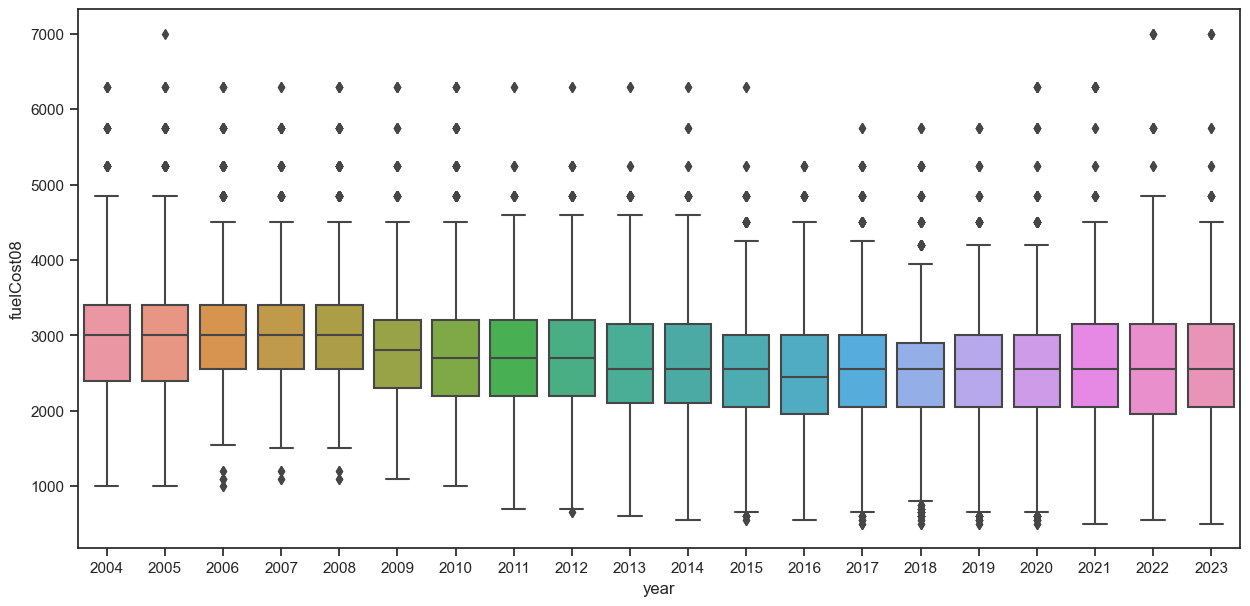

In [34]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =new_data['year'], y =new_data['fuelCost08'])

In [35]:
#Removal of outliers
new_data_clean = new_data [(new_data['feScore'] >=1) &
                            (new_data['cylinders']< 12) &
                            (new_data['displ'] < 7)].copy()

feScore is the EPA Fuel Economy Score (-1 = Not available) so I dropped it the -1 rows

In [36]:
new_data_clean.describe()

cylinders         displ         engId       feScore          year  \
count  27852.000000  27852.000000  27852.000000  27852.000000  27852.000000   
mean       5.458710      3.058469    230.125916      5.185301   2017.960649   
std        1.567523      1.245731    241.872210      1.896127      3.117364   
min        2.000000      0.000000      1.000000      1.000000   2013.000000   
25%        4.000000      2.000000     38.000000      4.000000   2015.000000   
50%        6.000000      3.000000    115.000000      5.000000   2018.000000   
75%        6.000000      3.600000    402.000000      6.000000   2021.000000   
max       10.000000      6.800000    999.000000     10.000000   2023.000000   

         fuelCost08  
count  27852.000000  
mean    2521.438317  
std      757.341225  
min      500.000000  
25%     2050.000000  
50%     2550.000000  
75%     3000.000000  
max     5750.000000

In [37]:
new_data_clean.isnull().sum()

cylinders     0
displ         0
drive         0
efid          0
engId         0
feScore       0
fuelType      0
make          0
model         0
trany         0
VClass        0
year          0
fuelCost08    0
dtype: int64

**Categorical and numerical variables**

In [38]:
numerical_features = new_data_clean._get_numeric_data().columns 
categorical_features = new_data_clean.columns.difference(numerical_features)

In [39]:
categorical_features

Index(['VClass', 'drive', 'efid', 'fuelType', 'make', 'model', 'trany'], dtype='object')

In [40]:
#just checking the classes of vehicles
new_data_clean['VClass'].value_counts()

Midsize Cars                          4397
Compact Cars                          3598
Small Sport Utility Vehicle 4WD       3141
Subcompact Cars                       2530
Standard Sport Utility Vehicle 4WD    2418
Large Cars                            2273
Small Sport Utility Vehicle 2WD       1848
Two Seaters                           1557
Minicompact Cars                      1078
Standard Pickup Trucks 4WD            1042
Standard Sport Utility Vehicle 2WD     862
Small Station Wagons                   846
Standard Pickup Trucks 2WD             735
Special Purpose Vehicle 2WD            336
Small Pickup Trucks 2WD                247
Small Pickup Trucks 4WD                245
Minivan - 2WD                          200
Midsize Station Wagons                 167
Vans, Passenger Type                   138
Special Purpose Vehicle 4WD             82
Vans, Cargo Type                        82
Minivan - 4WD                           30
Name: VClass, dtype: int64

**Checking for relationships between the categorical variables and the target variable**

In [41]:
VClass_economy = new_data_clean.groupby('VClass')['fuelCost08'].mean().reset_index().sort_values(by= 'fuelCost08', ascending = False)
VClass_economy

VClass   fuelCost08
21                Vans, Passenger Type  3765.942029
20                    Vans, Cargo Type  3668.292683
13         Special Purpose Vehicle 4WD  3184.146341
17  Standard Sport Utility Vehicle 4WD  3133.064516
19                         Two Seaters  3113.680154
15          Standard Pickup Trucks 4WD  3019.529750
16  Standard Sport Utility Vehicle 2WD  2906.032483
14          Standard Pickup Trucks 2WD  2797.891156
4                     Minicompact Cars  2791.929499
8              Small Pickup Trucks 4WD  2761.632653
18                     Subcompact Cars  2617.786561
12         Special Purpose Vehicle 2WD  2600.000000
3               Midsize Station Wagons  2578.143713
1                           Large Cars  2495.974483
7              Small Pickup Trucks 2WD  2488.259109
10     Small Sport Utility Vehicle 4WD  2373.527539
6                        Minivan - 4WD  2370.000000
5                        Minivan - 2WD  2325.000000
0                         Compact Cars  2209.116176
2                         Midsize Cars  2197.805322
9      Small Sport Utility Vehicle 2WD  2119.615801
11                Small Station Wagons  1881.796690

Text(0.5, 1.0, 'Economy by Vehicle Class')

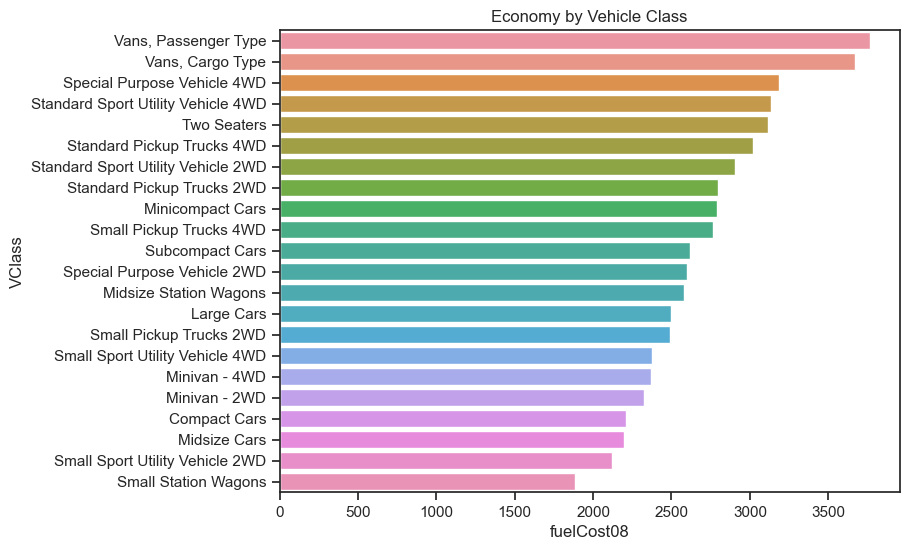

In [42]:
plt.figure(figsize=(8,6))
sns.barplot(y = VClass_economy['VClass'], x = VClass_economy['fuelCost08'], orient = 'h')

plt.xlabel('fuelCost08')
plt.ylabel("VClass")
plt.title("Economy by Vehicle Class")

In [43]:
Wd_economy = new_data_clean.groupby('drive')['fuelCost08'].mean().reset_index().sort_values(by= 'fuelCost08', ascending = False)
Wd_economy

drive   fuelCost08
0            4-Wheel Drive  3004.869079
4         Rear-Wheel Drive  2910.532520
3  Part-time 4-Wheel Drive  2823.748395
1          All-Wheel Drive  2584.961472
2        Front-Wheel Drive  1904.170132

Text(0.5, 1.0, 'Economy by Drive Type')

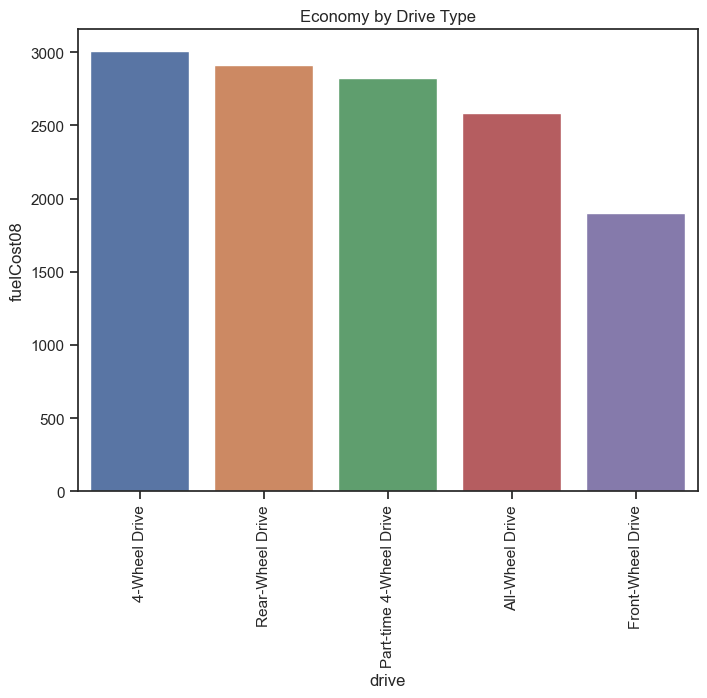

In [44]:
plt.figure(figsize=(8,6))
sns.barplot(x = Wd_economy['drive'], y = Wd_economy['fuelCost08'])

plt.xlabel('drive')
plt.ylabel("fuelCost08")
plt.xticks(rotation=90)
plt.title("Economy by Drive Type")

In [45]:
#Economy by Fuel_Type
Economy_by_Fuel = new_data_clean.groupby('fuelType')['fuelCost08'].mean().reset_index().sort_values(by= 'fuelCost08', ascending = False)
Economy_by_Fuel

fuelType   fuelCost08
5                      Midgrade  3324.054983
6                       Premium  2989.943764
9                Premium or E85  2938.961039
3               Gasoline or E85  2800.382653
8       Premium and Electricity  2591.447368
1                        Diesel  2569.031142
4       Gasoline or natural gas  2550.000000
7    Premium Gas or Electricity  2458.035714
10                      Regular  2143.389592
0                           CNG  1875.000000
11  Regular Gas and Electricity  1427.272727
12   Regular Gas or Electricity  1200.000000
2                   Electricity   726.182238

Text(0.5, 1.0, 'Economy by fuelType')

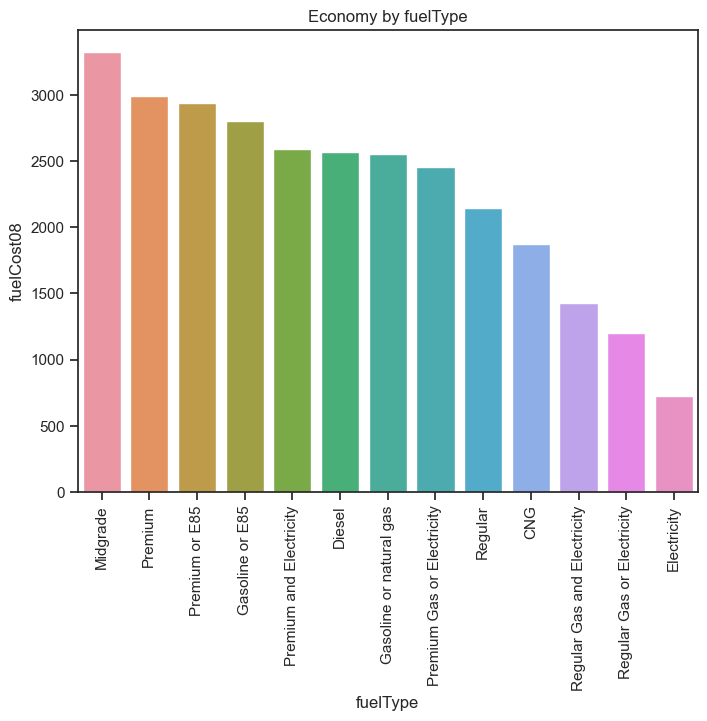

In [46]:
plt.figure(figsize=(8,6))
sns.barplot(x = Economy_by_Fuel['fuelType'], y = Economy_by_Fuel['fuelCost08'])

plt.xlabel('fuelType')
plt.ylabel("fuelCost08")
plt.xticks(rotation=90)
plt.title("Economy by fuelType")

In [47]:
Economy_by_make = new_data_clean.groupby('make')['fuelCost08'].mean().reset_index().sort_values(by= 'fuelCost08', ascending = False)
Top_10 = Economy_by_make.head(10)
Top_10

make   fuelCost08
45      Roush Performance  4520.930233
26            Lamborghini  4134.693878
6                 Bentley  3817.777778
2            Aston Martin  3783.333333
13                Ferrari  3775.694444
33               Maserati  3621.527778
35     McLaren Automotive  3533.333333
42         RUF Automobile  3500.000000
51                    VPG  3400.000000
38  Mobility Ventures LLC  3350.000000

Text(0.5, 1.0, 'Top 10 cars with the most Economy')

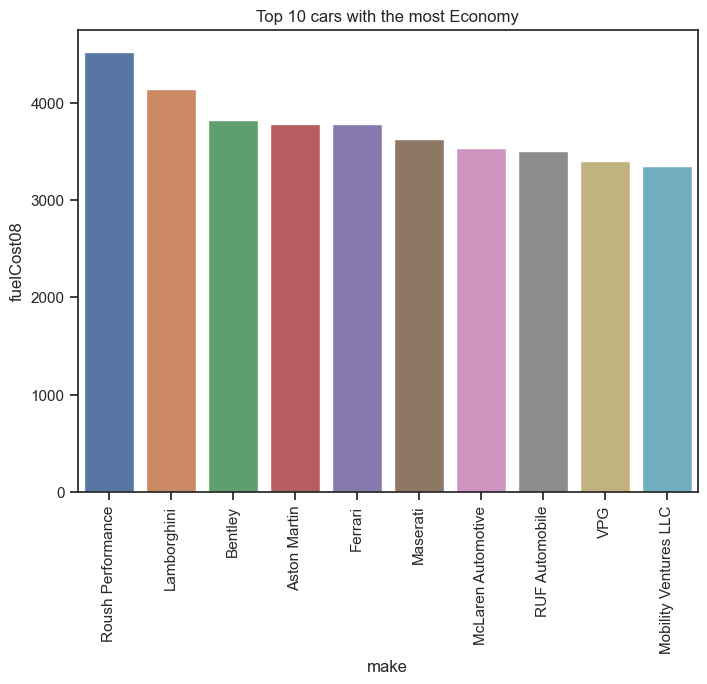

In [48]:
plt.figure(figsize=(8,6))
sns.barplot(x = Top_10['make'], y = Top_10['fuelCost08'])

plt.xlabel('make')
plt.ylabel("fuelCost08")
plt.xticks(rotation=90)
plt.title("Top 10 cars with the most Economy")

In [49]:
least_economy = Economy_by_make.tail(10)
least_economy

make   fuelCost08
19          Hyundai  1873.487179
18            Honda  1758.472687
54            smart  1200.000000
40         Polestar  1100.000000
44           Rivian  1031.250000
5               BYD  1030.000000
8   CODA Automotive   950.000000
49            Tesla   686.923077
23            Kandi   600.000000
31            Lucid   583.333333

Text(0.5, 1.0, 'Top 10 cars with the least Economy')

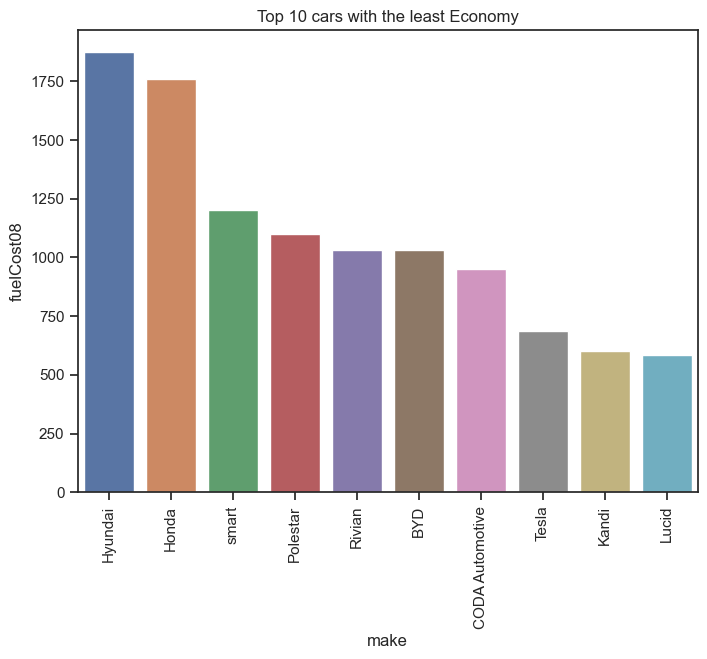

In [50]:
plt.figure(figsize=(8,6))
sns.barplot(x = least_economy['make'], y = least_economy['fuelCost08'])

plt.xlabel('make')
plt.ylabel("fuelCost08")
plt.xticks(rotation=90)
plt.title("Top 10 cars with the least Economy")

In [51]:
Economy_by_model = new_data_clean.groupby('model')['fuelCost08'].mean().reset_index().sort_values(by= 'fuelCost08', ascending = False)
Top_10_models = Economy_by_model.head(10)
Top_10_models

model  fuelCost08
968   G550 4x4 (Special Off-Road Model)     5750.00
967                            G550 4x4     5750.00
11                         1500 TRX 4WD     5250.00
814                      Escalade V 4WD     4850.00
969                             G63 AMG     4850.00
1075       Grand Cherokee Trackhawk 4WD     4850.00
1074       Grand Cherokee TrackHawk 4WD     4850.00
1435                       Mulsanne EWB     4850.00
1434                           Mulsanne     4818.75
291                             AMG G63     4675.00

Text(0.5, 1.0, 'Top 10 car models with the most Economy')

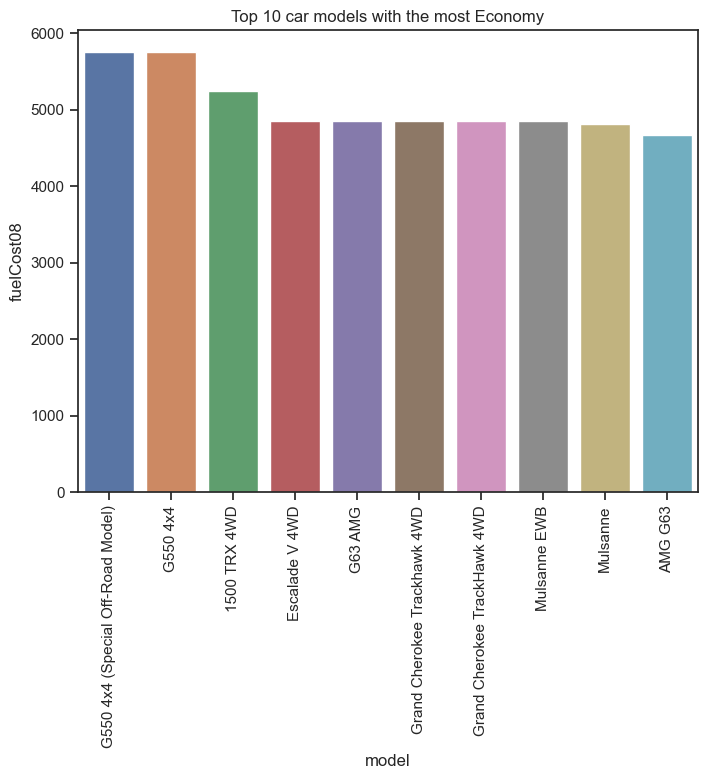

In [52]:
plt.figure(figsize=(8,6))
sns.barplot(x = Top_10_models['model'], y = Top_10_models['fuelCost08'])

plt.xlabel('model')
plt.ylabel("fuelCost08")
plt.xticks(rotation=90)
plt.title("Top 10 car models with the most Economy")

In [53]:
Economy_by_trany = new_data_clean.groupby('trany')['fuelCost08'].mean().reset_index().sort_values(by= 'fuelCost08', ascending = False)
Economy_by_trany 

trany   fuelCost08
24                  Automatic 10-spd  3267.421603
28                   Automatic 7-spd  3209.826590
20                    Automatic (S7)  3066.949153
33                      Manual 7-spd  3015.333333
9                    Automatic (AM7)  3003.483607
5                  Automatic (AM-S8)  3000.438596
6                  Automatic (AM-S9)  3000.000000
29                   Automatic 8-spd  2961.081081
26                   Automatic 5-spd  2901.915709
4                  Automatic (AM-S7)  2874.251497
25                   Automatic 4-spd  2825.853659
21                    Automatic (S8)  2773.566817
16                   Automatic (S10)  2752.192513
10                   Automatic (AM8)  2747.619048
27                   Automatic 6-spd  2699.137931
18                    Automatic (S5)  2655.303030
30                   Automatic 9-spd  2644.401544
22                    Automatic (S9)  2636.783042
32                      Manual 6-spd  2514.272388
19                    Automatic (S6)  2341.437925
17                    Automatic (S4)  2283.333333
15                 Automatic (AV-S8)  2091.379310
3                  Automatic (AM-S6)  1962.222222
31                      Manual 5-spd  1904.637437
14                 Automatic (AV-S7)  1864.900662
12                Automatic (AV-S10)  1832.558140
7                    Automatic (AM5)  1750.000000
13                 Automatic (AV-S6)  1731.987578
8                    Automatic (AM6)  1659.656652
23  Automatic (variable gear ratios)  1588.202247
2                 Automatic (AM-S10)  1500.000000
11                 Automatic (AV-S1)  1477.083333
1                     Automatic (A2)   924.390244
0                     Automatic (A1)   782.783883

Text(0.5, 1.0, 'Economy by trany')

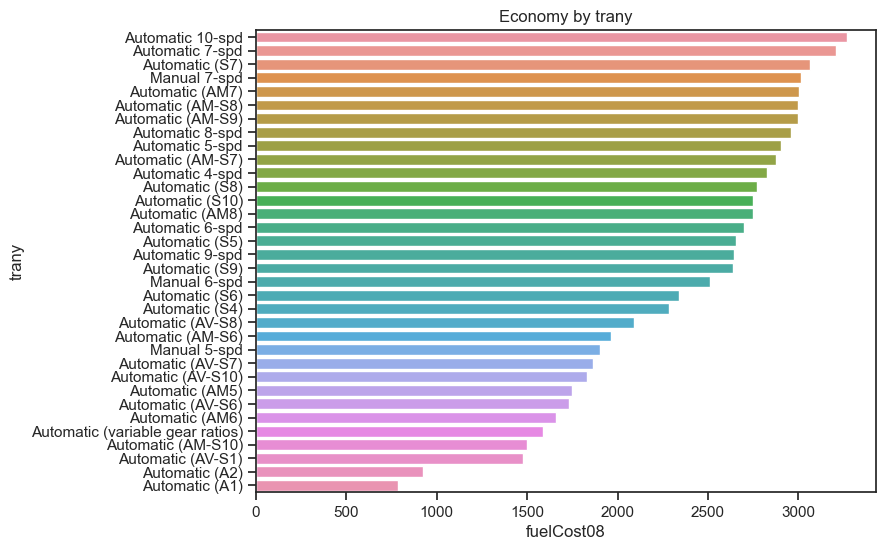

In [54]:
plt.figure(figsize=(8,6))
sns.barplot(y = Economy_by_trany['trany'], x = Economy_by_trany['fuelCost08'], orient = 'h')

plt.xlabel('fuelCost08')
plt.ylabel("trany")
plt.title("Economy by trany")

**Separating Input and Target variables, then, Numerical and Categorical Variables from Input variables**

In [55]:
Y = new_data_clean["fuelCost08"]
X = new_data_clean.drop(columns='fuelCost08')

In [56]:
numerical_features = X._get_numeric_data().columns 
categorical_features = X.columns.difference(numerical_features)

In [57]:
numerical_features

Index(['cylinders', 'displ', 'engId', 'feScore', 'year'], dtype='object')

In [58]:
# creating tables with numerical and categorical variables
num_features = X[numerical_features]
cat_features = X[categorical_features]

In [59]:
#printing the counts of all categorical input with respect to trany feature
cat_features['fuelType'].value_counts()

Premium                        12092
Regular                        12087
Gasoline or E85                 1176
Electricity                      867
Diesel                           578
Premium and Electricity          304
Midgrade                         291
Regular Gas and Electricity      165
Premium or E85                   154
Premium Gas or Electricity       112
Regular Gas or Electricity        16
CNG                                8
Gasoline or natural gas            2
Name: fuelType, dtype: int64

**Feature Scaling**


In [60]:
from sklearn.preprocessing import StandardScaler

ss =StandardScaler()
    
for col in num_features.columns:
    num_features[col] = ss.fit_transform(num_features[[col]]).squeeze()

**Label Enconding the Categorical Features**

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_features = cat_features.astype(str).apply(LabelEncoder().fit_transform)

In [62]:
#printing the counts of all categorical input with respect to trany feature
cat_features['fuelType'].value_counts()

6     12092
10    12087
3      1176
2       867
1       578
8       304
5       291
11      165
9       154
7       112
12       16
0         8
4         2
Name: fuelType, dtype: int64

**Concatenating the Numerical and Categorical Variables**

In [63]:
X = pd.concat([num_features, cat_features], axis = 1)

# Model Development

## Random Forest Regression

In [64]:
# Split the data into training and test samples (stratifying by the most important categorical feature)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf =  RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=500,
                      min_samples_split=1000, n_estimators=500)
rf = rf.fit(X_train, Y_train)

In [66]:
# Compute training R2
training_R2 = rf.score(X_train, Y_train)
training_R2

0.9053650244725439

Text(0.5, 1.0, 'Training R2 = 0.91  Test R2 = 0.90')

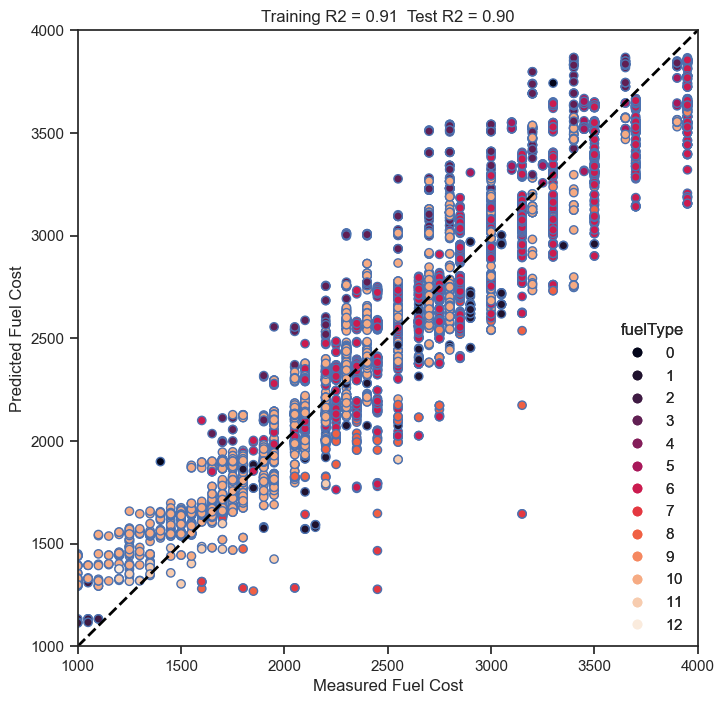

In [67]:
# Making prediction using test data
Y_pred = rf.predict(X_test) 

# Compute test R2
test_R2 = rf.score(X_test, Y_test)   

# Calculating MSE 
from sklearn.metrics import mean_squared_error 
error = mean_squared_error(Y_test, Y_pred) 
residual = (Y_test - Y_pred)  
   
# Also create a series of plots for predicted fuel cost versus actual fuel cost 
fig = plt.figure(figsize=(8, 8))
plt.axis([1000, 4000, 1000, 4000])
scatter = plt.scatter(Y_test, Y_pred, c=X_test['fuelType'], edgecolor = 'b') # colored the dataset distribution by fuel type

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="fuelType")
plt.gca().add_artist(legend1)

plt.plot([1000, 4000],[1000, 4000], color='black', linewidth=2, linestyle='--')


plt.ylabel('Predicted Fuel Cost') 
plt.xlabel('Measured Fuel Cost') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

I colored the algorithm plots by the most important categorical feature 'fuel type' to see possible patterns and relationships between the different fuel types.

### Using Cross-Validation for Tuning the Hyperparameter K.

In [68]:
from sklearn.model_selection import GridSearchCV

#params = {'n_estimators': [200, 500], 'max_depth': [5, 10]}
params = {'n_estimators': [200, 500], 'max_depth': [5, 10], 'min_samples_split': [200, 1000], 'min_samples_leaf': [500, 1000], 'max_features': [3, 6]}

rf = RandomForestRegressor()

grid_search = GridSearchCV(rf, params, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10], 'max_features': [3, 6],
                         'min_samples_leaf': [500, 1000],
                         'min_samples_split': [200, 1000],
                         'n_estimators': [200, 500]},
             scoring='neg_root_mean_squared_error')

In [69]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

In [70]:
cv_res[['params','split0_test_score','split1_test_score','split2_test_score', 'mean_test_score', 'std_test_score', 
        'rank_test_score']]

params  split0_test_score  \
27  {'max_depth': 10, 'max_features': 6, 'min_samp...        -260.522985   
24  {'max_depth': 10, 'max_features': 6, 'min_samp...        -257.866266   
25  {'max_depth': 10, 'max_features': 6, 'min_samp...        -263.670159   
11  {'max_depth': 5, 'max_features': 6, 'min_sampl...        -260.524670   
26  {'max_depth': 10, 'max_features': 6, 'min_samp...        -263.961717   
9   {'max_depth': 5, 'max_features': 6, 'min_sampl...        -262.860956   
10  {'max_depth': 5, 'max_features': 6, 'min_sampl...        -263.295198   
8   {'max_depth': 5, 'max_features': 6, 'min_sampl...        -259.257252   
16  {'max_depth': 10, 'max_features': 3, 'min_samp...        -316.530727   
19  {'max_depth': 10, 'max_features': 3, 'min_samp...        -323.339479   
17  {'max_depth': 10, 'max_features': 3, 'min_samp...        -319.956769   
18  {'max_depth': 10, 'max_features': 3, 'min_samp...        -323.264083   
1   {'max_depth': 5, 'max_features': 3, 'min_sampl...        -325.881573   
3   {'max_depth': 5, 'max_features': 3, 'min_sampl...        -326.178624   
0   {'max_depth': 5, 'max_features': 3, 'min_sampl...        -329.556021   
2   {'max_depth': 5, 'max_features': 3, 'min_sampl...        -321.293198   
30  {'max_depth': 10, 'max_features': 6, 'min_samp...        -341.960615   
29  {'max_depth': 10, 'max_features': 6, 'min_samp...        -340.684424   
14  {'max_depth': 5, 'max_features': 6, 'min_sampl...        -344.105251   
15  {'max_depth': 5, 'max_features': 6, 'min_sampl...        -343.417556   
31  {'max_depth': 10, 'max_features': 6, 'min_samp...        -341.157040   
13  {'max_depth': 5, 'max_features': 6, 'min_sampl...        -342.284995   
28  {'max_depth': 10, 'max_features': 6, 'min_samp...        -345.136201   
12  {'max_depth': 5, 'max_features': 6, 'min_sampl...        -340.822287   
20  {'max_depth': 10, 'max_features': 3, 'min_samp...        -400.424549   
22  {'max_depth': 10, 'max_features': 3, 'min_samp...        -395.382174   
4   {'max_depth': 5, 'max_features': 3, 'min_sampl...        -402.259054   
23  {'max_depth': 10, 'max_features': 3, 'min_samp...        -399.154370   
6   {'max_depth': 5, 'max_features': 3, 'min_sampl...        -405.584535   
5   {'max_depth': 5, 'max_features': 3, 'min_sampl...        -404.288687   
21  {'max_depth': 10, 'max_features': 3, 'min_samp...        -400.201052   
7   {'max_depth': 5, 'max_features': 3, 'min_sampl...        -403.738064   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
27        -233.489637        -236.736973      -243.029151        7.671391   
24        -235.855512        -237.625328      -243.341694        6.391675   
25        -234.444932        -238.216289      -243.624117        7.975685   
11        -234.064333        -237.107611      -244.132453        7.496673   
26        -231.984168        -235.281119      -244.213374        8.728297   
9         -235.588653        -239.360354      -245.029993        7.491057   
10        -238.410223        -236.559608      -245.196809        7.593493   
8         -237.400608        -240.218360      -245.796973        6.316698   
16        -283.685209        -278.193359      -297.331012       12.740905   
19        -287.773147        -281.787384      -299.638183       11.754107   
17        -287.951507        -281.318610      -299.749829       11.726137   
18        -296.411344        -282.479558      -299.856144       11.158595   
1         -289.639955        -283.471257      -302.641223       11.941819   
3         -288.545972        -286.666536      -302.675762       11.506645   
0         -293.060768        -289.401994      -303.317277       11.869363   
2         -292.453492        -281.922525      -304.316917       11.819002   
30        -310.939112        -305.387440      -323.667660       10.218528   
29        -312.184132        -306.489800      -323.920553       10.897383   
14        -312.659626        -309.432947      -324.281988       11.348062  

In [71]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=500,
                      min_samples_split=1000, n_estimators=500)

In [72]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=500,
                      min_samples_split=200, n_estimators=500)
rmse = -cross_val_score(rf, X_train, Y_train, scoring="neg_root_mean_squared_error", cv=10)

Text(0.5, 1.0, 'RMSE Values obtained over 10-Fold Cross-validation \n using RF Regression with an optimal set of parameters')

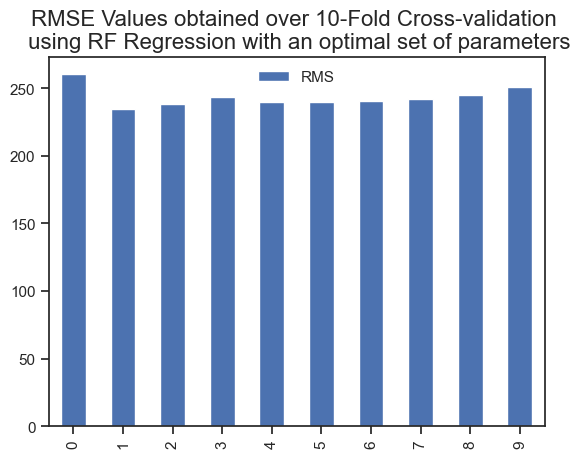

In [73]:
new_data_rf_rmses = pd.DataFrame(rmse, columns = ['RMS'])
new_data_rf_rmses.plot(kind = 'bar')
plt.title('RMSE Values obtained over 10-Fold Cross-validation \n using RF Regression with an optimal set of parameters', fontsize = 16)

### Apply Best Hyperparameter to the Test Data

In [74]:
rf = RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=500,
                      min_samples_split=1000, n_estimators=500)
rf.fit(X_train, Y_train) 

# Compute training R2
training_R2 = rf.score(X_train, Y_train) 

In [75]:
# Make prediction using test data
Y_pred = rf.predict(X_test)  

# Compute test R2
test_R2 = rf.score(X_test, Y_test)       

Text(0.5, 1.0, 'Training R2 = 0.90  Test R2 = 0.90')

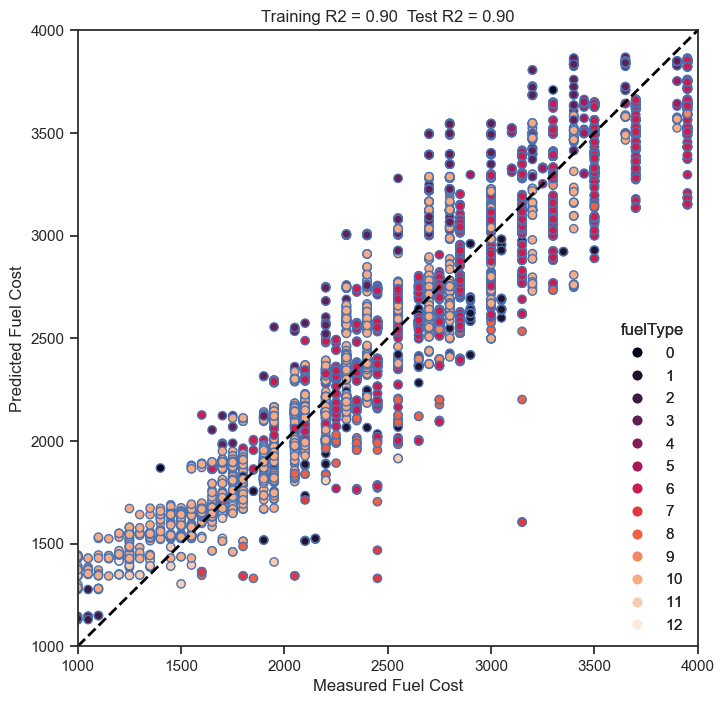

In [76]:
# Calculating MSE 
from sklearn.metrics import mean_squared_error 
error = mean_squared_error(Y_test, Y_pred) 
residual = (Y_test - Y_pred)  
   
# Also create a series of plots for predicted fuel cost versus actual fuel cost 
fig = plt.figure(figsize=(8, 8))
plt.axis([1000, 4000, 1000, 4000])
scatter = plt.scatter(Y_test, Y_pred, c=X_test['fuelType'], edgecolor = 'b') # colored the dataset distribution by fuel type

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="fuelType")
plt.gca().add_artist(legend1)

plt.plot([1000, 4000],[1000, 4000], color='black', linewidth=2, linestyle='--')


plt.ylabel('Predicted Fuel Cost') 
plt.xlabel('Measured Fuel Cost') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

**Feature Importance**

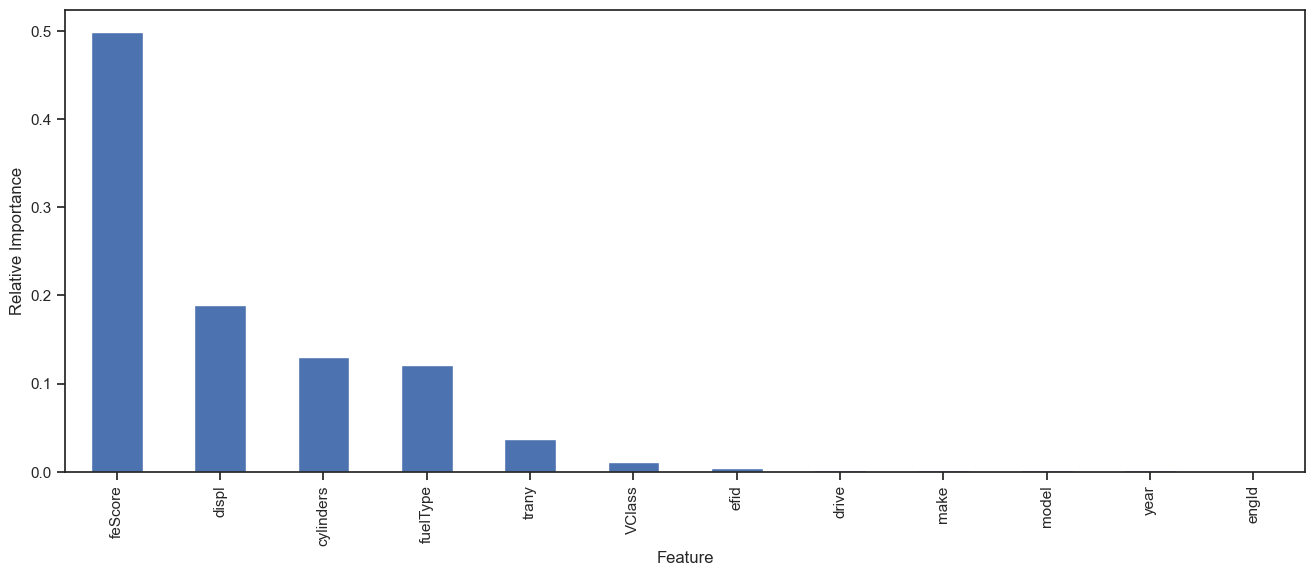

In [77]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(xlabel='Feature');

In [78]:
feature_imp

feScore      0.499038
displ        0.188767
cylinders    0.130507
fuelType     0.120620
trany        0.037217
VClass       0.011099
efid         0.004157
drive        0.002270
make         0.001868
model        0.001709
year         0.001607
engId        0.001141
dtype: float64

## KNN Regression

In [79]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 

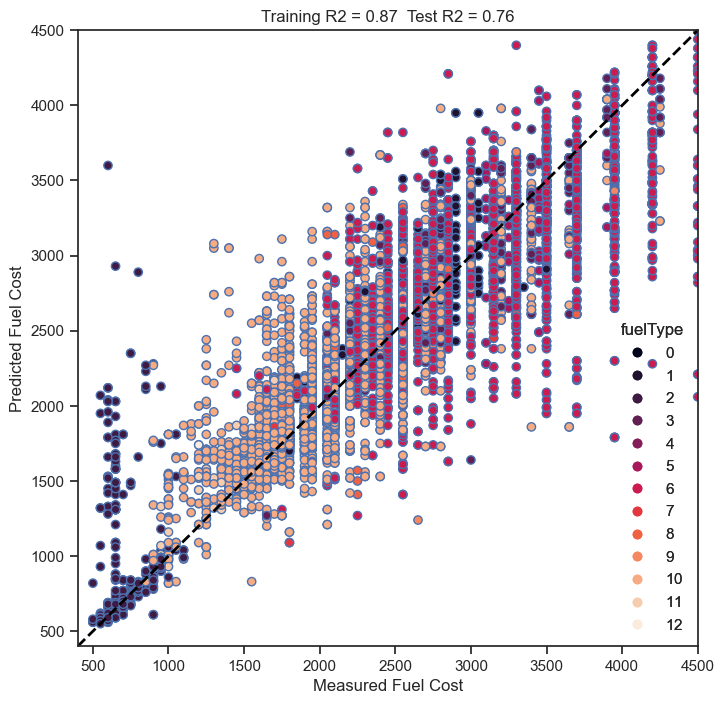

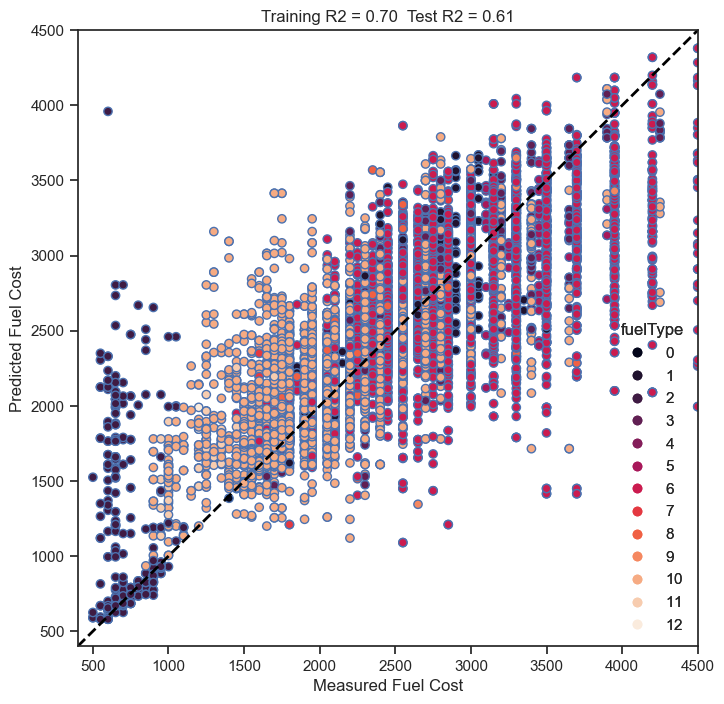

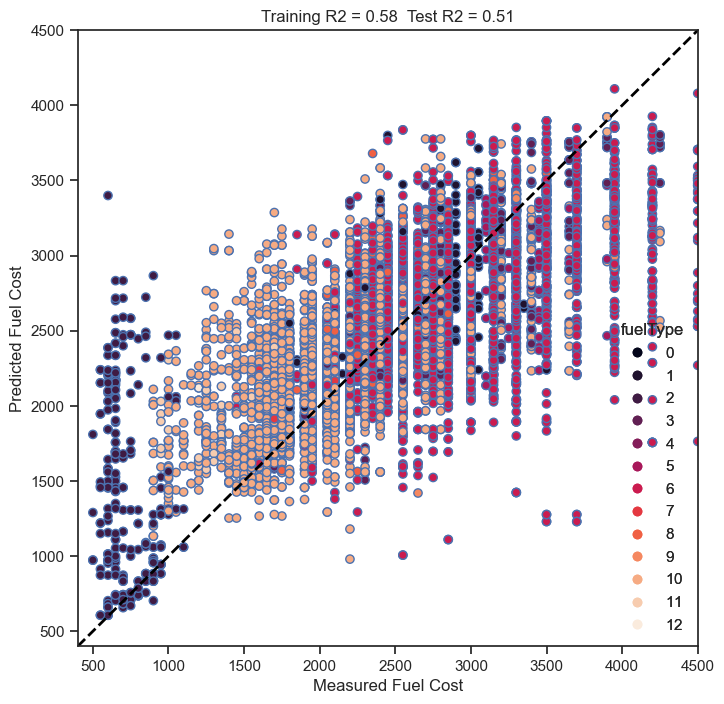

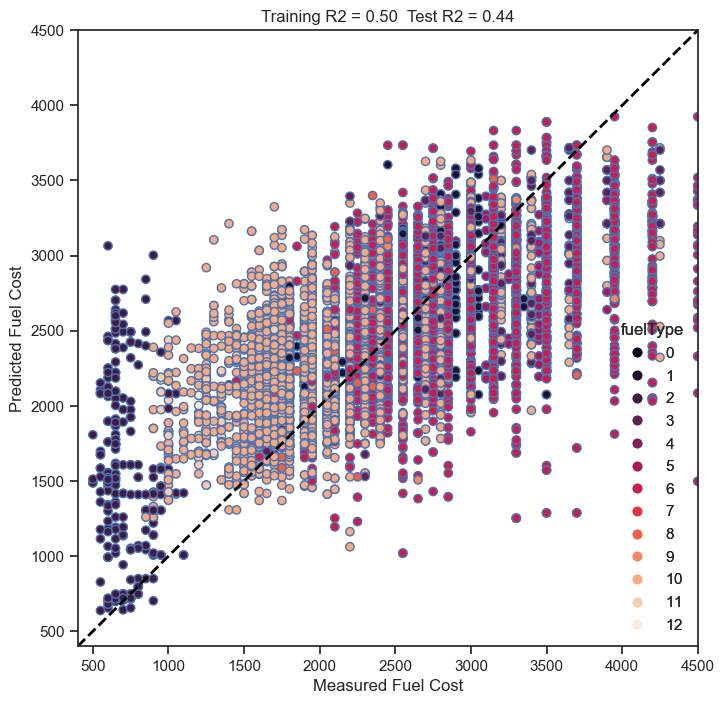

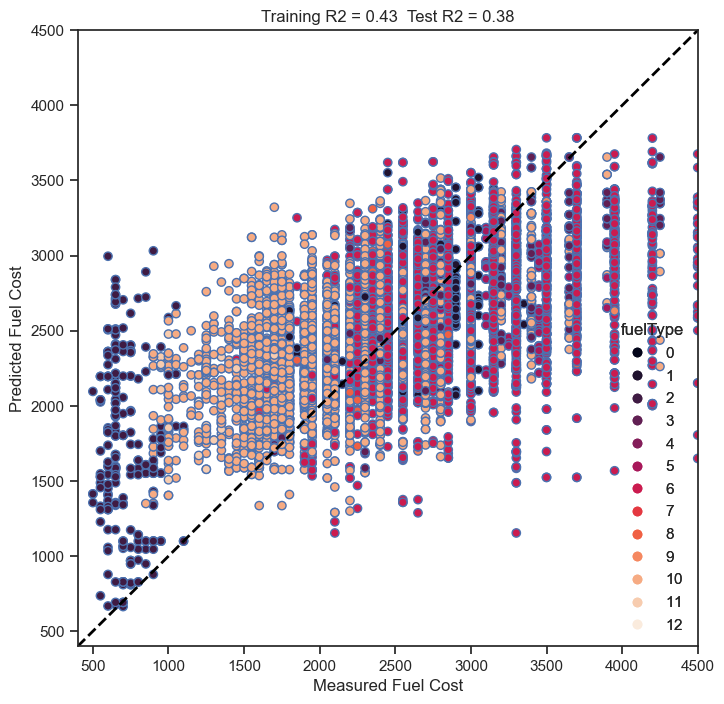

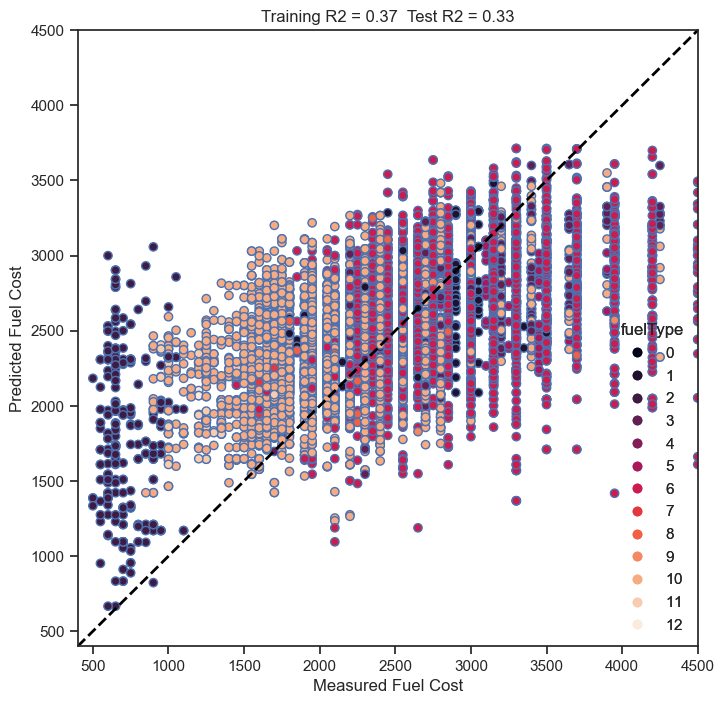

In [80]:
# To store MSE values for different k
MSE = [] 

# To store values of K
k   = []   

 # To store R2
R2  = []     

for K in range(5, 31, 5):
    k.append(K)
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    # Fit the model to the training dataset
    knn.fit(X_train, Y_train)  
    
    # Compute training R2
    training_R2 = knn.score(X_train, Y_train) 
    
    # Make prediction using test data
    Y_pred = knn.predict(X_test)  
    
    # Compute test R2
    test_R2 = knn.score(X_test, Y_test)       
    R2.append(test_R2)
    
    # Calculate MSE
    error = mean_squared_error(Y_test, Y_pred)
    
    # Store MSE values for different K
    MSE.append(error)                          
    residual = (Y_test - Y_pred)  
   
    # Create a series of plots for predicted versus actual fuel cost 
    
    fig = plt.figure(figsize=(8, 8))
    plt.axis([400, 4500, 400, 4500])
    scatter = plt.scatter(Y_test, Y_pred, c=X_test['fuelType'], edgecolor = 'b')
    
    # Add a legend
    legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="fuelType")
    plt.gca().add_artist(legend1)
    plt.plot([400, 4500],[400, 4500], color='black', linewidth=2, linestyle='--')


    plt.ylabel('Predicted Fuel Cost') 
    plt.xlabel('Measured Fuel Cost') 
    plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

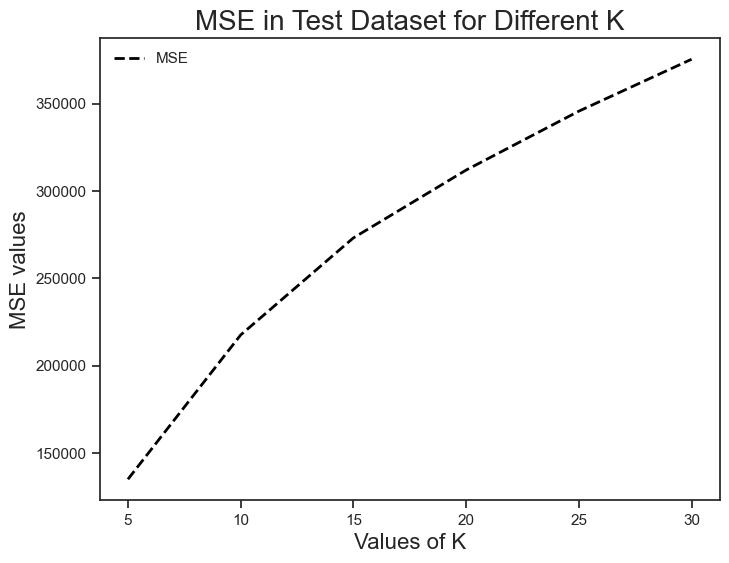

In [81]:
#plotting the mse values against k values
fig = plt.figure(K, figsize=(8, 6))
plt.plot(k, MSE, label = 'MSE', color='black', linewidth=2, linestyle='--')
plt.xlabel ('Values of K', fontsize = 16)
plt.ylabel ('MSE values', fontsize = 16)
plt.title ('MSE in Test Dataset for Different K', fontsize = 20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.legend()

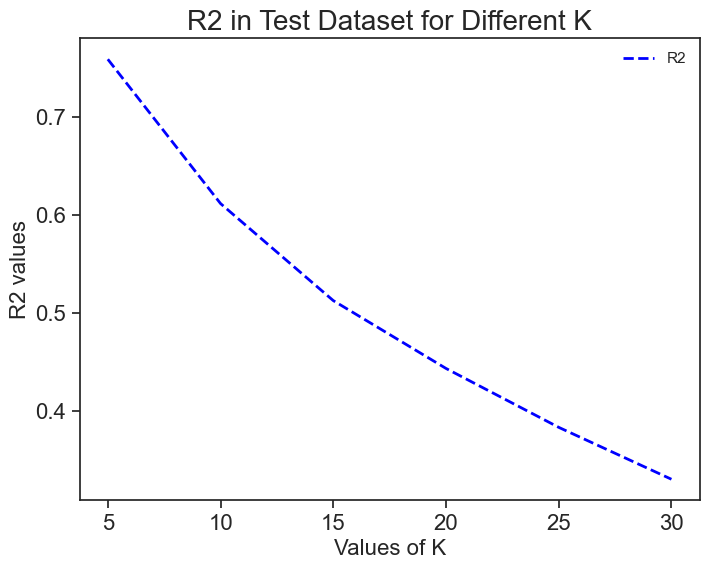

In [82]:
#plotting the r2 values against k values
fig = plt.figure(K, figsize=(8, 6))
plt.plot(k, R2, label = 'R2', color='blue', linewidth=2, linestyle='--')
plt.xlabel ('Values of K', fontsize = 16)
plt.ylabel ('R2 values', fontsize = 16)
plt.title ('R2 in Test Dataset for Different K', fontsize = 20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.legend()

### Using Cross-Validation for Tuning the Hyperparameter K.

In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(5, 31, 5)}

knn = neighbors.KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 31, 5)},
             scoring='neg_root_mean_squared_error')

In [84]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

In [85]:
cv_res[['params','split0_test_score','split1_test_score','split2_test_score', 'mean_test_score', 'std_test_score', 
        'rank_test_score']]

params  split0_test_score  split1_test_score  \
0   {'n_neighbors': 5}        -417.176099        -385.644183   
1  {'n_neighbors': 10}        -512.504459        -477.396156   
2  {'n_neighbors': 15}        -565.532918        -533.070485   
3  {'n_neighbors': 20}        -602.900367        -568.927181   
4  {'n_neighbors': 25}        -634.037825        -598.357915   
5  {'n_neighbors': 30}        -657.295654        -625.193274   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  
0        -411.138632      -398.875230       12.198404                1  
1        -506.346960      -499.641263       10.657295                2  
2        -556.225241      -554.192357        9.078828                3  
3        -591.521818      -591.167201        9.536764                4  
4        -612.896911      -619.763229       11.273888                5  
5        -634.394026      -642.624216       11.951196                6

In [86]:
grid_search.best_estimator_

KNeighborsRegressor()

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

rmse = -cross_val_score(knn, X_train, Y_train, scoring="neg_root_mean_squared_error", cv=10)

Text(0.5, 1.0, 'RMSE Values obtained over 10-Fold Cross-validation \n using KNN Regression with an optimal set of parameters')

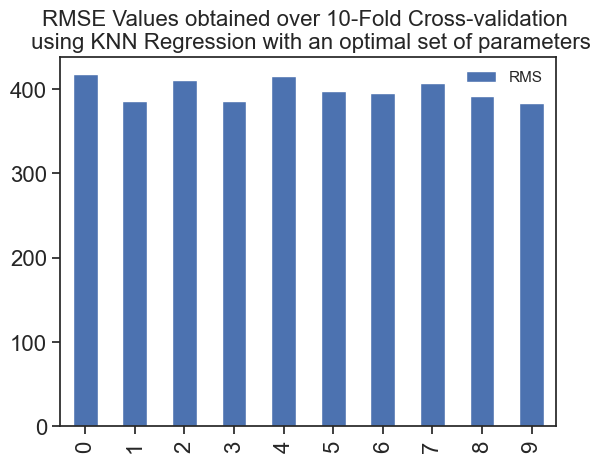

In [88]:
new_data_knn_rmses = pd.DataFrame(rmse, columns = ['RMS'])
new_data_knn_rmses.plot(kind = 'bar')
plt.title('RMSE Values obtained over 10-Fold Cross-validation \n using KNN Regression with an optimal set of parameters', fontsize = 16)


### Apply Best Hyperparameter to the Test Data

In [89]:
knn = KNeighborsRegressor()

knn.fit(X_train, Y_train) 

KNeighborsRegressor()

In [90]:
# Compute training R2
training_R2 = knn.score(X_train, Y_train)

In [91]:
training_R2

0.8699221104392347

In [92]:
# Make prediction using test data
Y_pred = knn.predict(X_test)  

# Compute test R2
test_R2 = knn.score(X_test, Y_test) 

Text(0.5, 1.0, 'Training R2 = 0.87  Test R2 = 0.76')

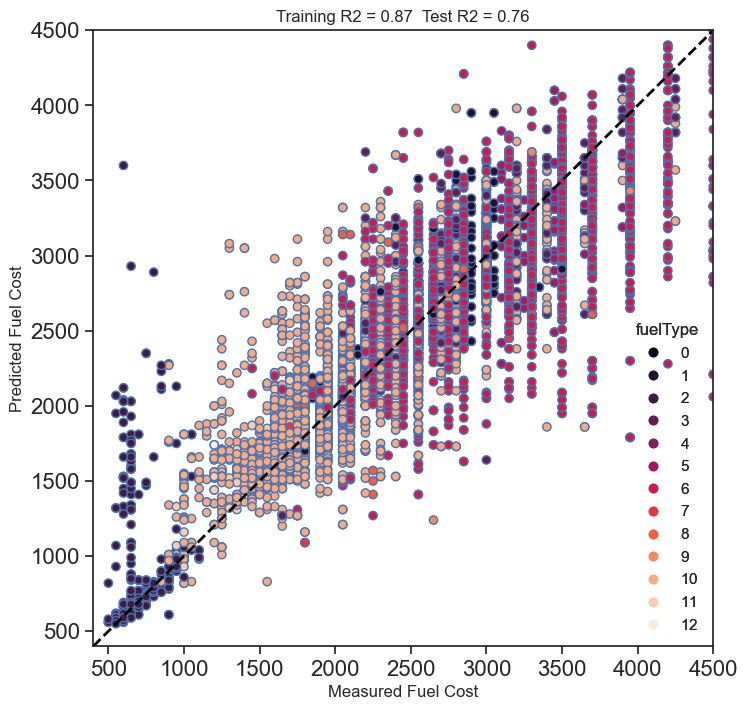

In [93]:
# Create a series of plots for predicted versus actual fuel cost
fig = plt.figure(figsize=(8, 8))
plt.axis([400, 4500, 400, 4500])
scatter = plt.scatter(Y_test, Y_pred, c=X_test['fuelType'], edgecolor = 'b')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="fuelType")
plt.gca().add_artist(legend1)

plt.plot([400, 4500],[400, 4500], color='black', linewidth=2, linestyle='--')


plt.ylabel('Predicted Fuel Cost') 
plt.xlabel('Measured Fuel Cost') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

## Decision Tree Regression

In [94]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error 

dt = DecisionTreeRegressor(max_depth=15, min_samples_leaf=200, min_samples_split=200)

# Fit the model to the training dataset
dt.fit(X_train, Y_train)  

# Compute training R2
training_R2 = dt.score(X_train, Y_train) 

In [95]:
# Make prediction using test data
Y_pred = dt.predict(X_test)  

# Compute test R2
test_R2 = dt.score(X_test, Y_test)       

# Calculate MSE
error = mean_squared_error(Y_test, Y_pred) 
residual = (Y_test - Y_pred)  
   

Text(0.5, 1.0, 'Training R2 = 0.95  Test R2 = 0.95')

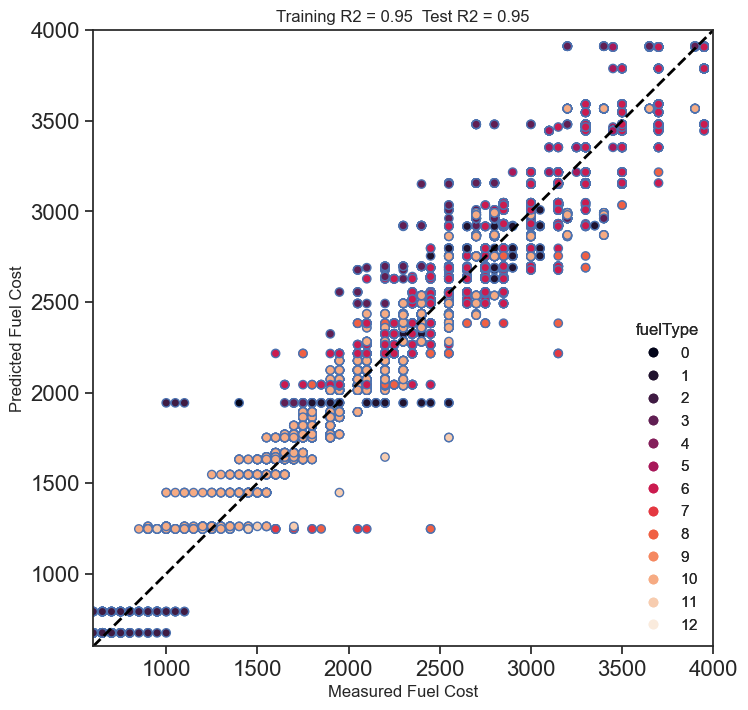

In [96]:
# Create a series of plots for predicted versus actual fuel cost 

fig = plt.figure(figsize=(8, 8))
plt.axis([600, 4000, 600, 4000])
scatter = plt.scatter(Y_test, Y_pred, c=X_test['fuelType'], edgecolor = 'b')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="fuelType")
plt.gca().add_artist(legend1)

plt.plot([600, 4000],[600, 4000], color='black', linewidth=2, linestyle='--')


plt.ylabel('Predicted Fuel Cost') 
plt.xlabel('Measured Fuel Cost') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

### Using Cross-Validation for Tuning the Hyperparameter K.

In [97]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [10, 15], 'min_samples_split': [200, 1000], 'min_samples_leaf': [200, 500]}

dt = DecisionTreeRegressor()

grid_search = GridSearchCV(dt, params, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 15], 'min_samples_leaf': [200, 500],
                         'min_samples_split': [200, 1000]},
             scoring='neg_root_mean_squared_error')

In [98]:
cv_reg = pd.DataFrame(grid_search.cv_results_)
cv_reg.sort_values(by="mean_test_score", ascending=False, inplace=True)

In [99]:
cv_reg[['params','split0_test_score','split1_test_score','split2_test_score', 'mean_test_score', 'std_test_score', 
        'rank_test_score']]

params  split0_test_score  \
4  {'max_depth': 15, 'min_samples_leaf': 200, 'mi...        -193.974083   
0  {'max_depth': 10, 'min_samples_leaf': 200, 'mi...        -193.974083   
1  {'max_depth': 10, 'min_samples_leaf': 200, 'mi...        -215.117378   
5  {'max_depth': 15, 'min_samples_leaf': 200, 'mi...        -215.117378   
7  {'max_depth': 15, 'min_samples_leaf': 500, 'mi...        -236.466000   
3  {'max_depth': 10, 'min_samples_leaf': 500, 'mi...        -236.613832   
6  {'max_depth': 15, 'min_samples_leaf': 500, 'mi...        -236.613832   
2  {'max_depth': 10, 'min_samples_leaf': 500, 'mi...        -236.613832   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
4        -170.162773        -181.039510      -179.115145        6.952995   
0        -170.162773        -181.039510      -179.122318        6.955495   
1        -190.631370        -208.027337      -205.445969        6.858853   
5        -190.631370        -208.027337      -205.445969        6.858853   
7        -224.006382        -247.216879      -240.374196        8.439682   
3        -224.006382        -247.216879      -240.388980        8.432950   
6        -224.006382        -247.216879      -240.388980        8.432950   
2        -224.006382        -247.216879      -240.391097        8.433019   

   rank_test_score  
4                1  
0                2  
1                3  
5                3  
7                5  
3                6  
6                6  
2                8

In [100]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=15, min_samples_leaf=200, min_samples_split=200)

In [101]:
from sklearn.model_selection import cross_val_score

dt = DecisionTreeRegressor(max_depth=10, min_samples_leaf=200, min_samples_split=200)
rmse = -cross_val_score(dt, X_train, Y_train, scoring="neg_root_mean_squared_error", cv=10)

Text(0.5, 1.0, 'RMSE Values obtained over 10-Fold Cross-validation \n using DT Regression with an optimal set of parameters')

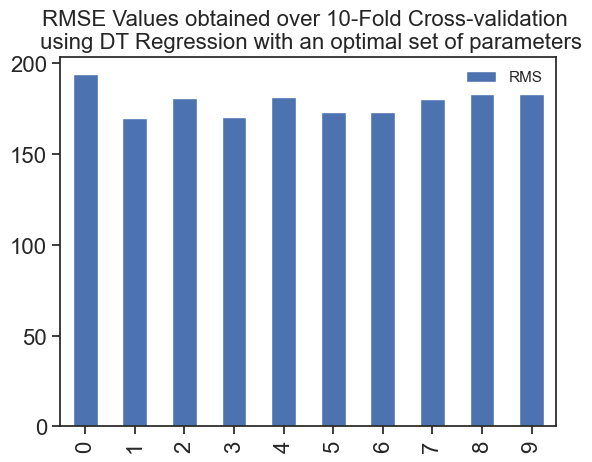

In [102]:
df_dt_rmses = pd.DataFrame(rmse, columns = ['RMS'])
df_dt_rmses.plot(kind = 'bar')
plt.title('RMSE Values obtained over 10-Fold Cross-validation \n using DT Regression with an optimal set of parameters', fontsize = 16)

### Apply Best Hyperparameter to the Test Data

In [103]:
dt = DecisionTreeRegressor(max_depth=15, min_samples_leaf=200, min_samples_split=200)

dt.fit(X_train, Y_train) 

DecisionTreeRegressor(max_depth=15, min_samples_leaf=200, min_samples_split=200)

In [104]:
# Compute training R2
training_R2 = dt.score(X_train, Y_train) 

training_R2

0.9482368596564201

In [105]:
# Make prediction using test data
Y_pred = dt.predict(X_test)  

# Compute test R2
test_R2 = dt.score(X_test, Y_test) 

Text(0.5, 1.0, 'Training R2 = 0.95  Test R2 = 0.95')

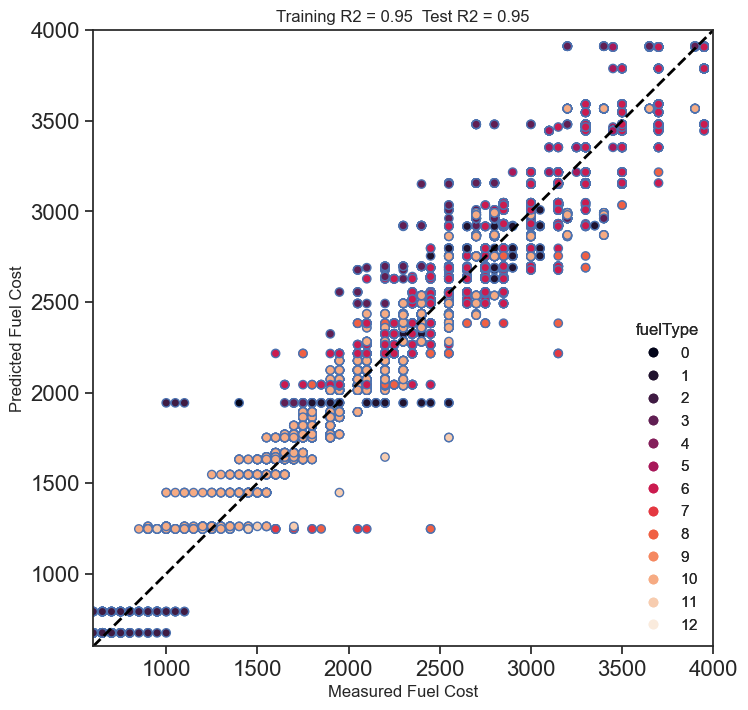

In [106]:
# Create a series of plots for predicted versus actual fuel cost
fig = plt.figure(figsize=(8, 8))
plt.axis([600, 4000, 600, 4000])
scatter = plt.scatter(Y_test, Y_pred, c=X_test['fuelType'], edgecolor = 'b')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="fuelType")
plt.gca().add_artist(legend1)

plt.plot([600, 4000],[600, 4000], color='black', linewidth=2, linestyle='--')


plt.ylabel('Predicted Fuel Cost') 
plt.xlabel('Measured Fuel Cost') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

## ANN Model

In [107]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Create an MLPRegressor object and set the hyperparameters
ann = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='adam', alpha=0.0001, 
                   learning_rate='constant', learning_rate_init=0.001, max_iter=200, random_state=32)

In [108]:
# Fit the model to the training dataset
ann.fit(X_train, Y_train)  

# Compute training R2
training_R2 = ann.score(X_train, Y_train) 

In [109]:
training_R2

0.691702022770051

In [110]:
# Make prediction using test data
Y_pred = ann.predict(X_test)  

# Compute test R2
test_R2 = ann.score(X_test, Y_test)       

# Calculate MSE
error = mean_squared_error(Y_test, Y_pred) 
residual = (Y_test - Y_pred)  
   

Text(0.5, 1.0, 'Training R2 = 0.69  Test R2 = 0.68')

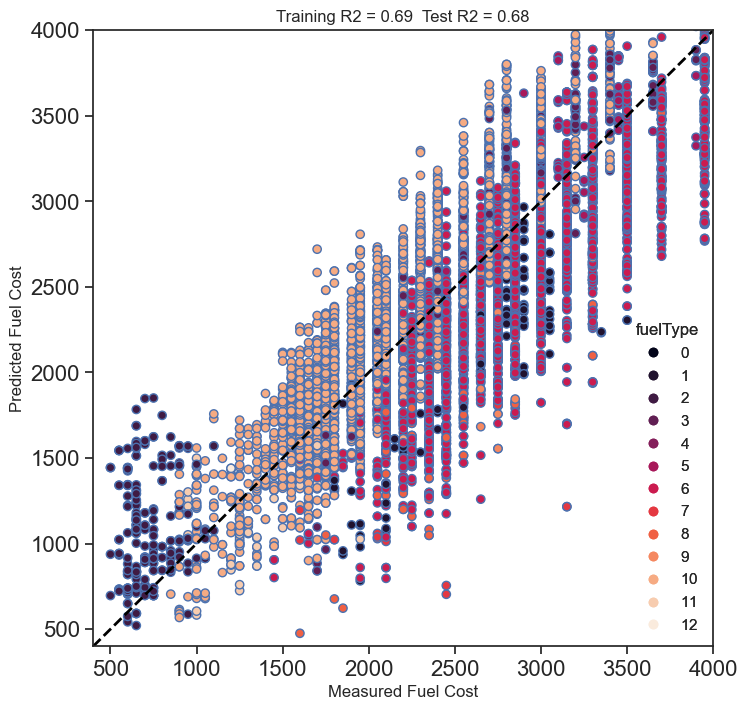

In [111]:
# Create a series of plots for predicted versus actual fuel cost for different values of K
# Also create a series of plots for predicted versus actual DT for different values of K
fig = plt.figure(figsize=(8, 8))
plt.axis([400, 4000, 400, 4000])
scatter = plt.scatter(Y_test, Y_pred, c=X_test['fuelType'], edgecolor = 'b')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="fuelType")
plt.gca().add_artist(legend1)

plt.plot([400, 4000],[400, 4000], color='black', linewidth=2, linestyle='--')


plt.ylabel('Predicted Fuel Cost') 
plt.xlabel('Measured Fuel Cost') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

### Using Cross-Validation for Tuning the Hyperparameter K.

In [112]:
from sklearn.model_selection import GridSearchCV

# Create an MLPRegressor object
ann = MLPRegressor(random_state=32)

# Set up the hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(10,10), (50,50), (100,100), (150,150)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.001],
    'max_iter': [50]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(ann, param_grid, cv=5)

# Fit the GridSearchCV object to the training dataset
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(random_state=32),
             param_grid={'activation': ['relu'], 'alpha': [0.0001],
                         'hidden_layer_sizes': [(10, 10), (50, 50), (100, 100),
                                                (150, 150)],
                         'learning_rate': ['constant'],
                         'learning_rate_init': [0.001], 'max_iter': [50],
                         'solver': ['adam']})

In [113]:
cv_reg = pd.DataFrame(grid_search.cv_results_)
cv_reg.sort_values(by="mean_test_score", ascending=False, inplace=True)

In [114]:
cv_reg[['params','split0_test_score','split1_test_score','split2_test_score', 'mean_test_score', 'std_test_score', 
        'rank_test_score']]

params  split0_test_score  \
3  {'activation': 'relu', 'alpha': 0.0001, 'hidde...           0.876192   
2  {'activation': 'relu', 'alpha': 0.0001, 'hidde...           0.858815   
1  {'activation': 'relu', 'alpha': 0.0001, 'hidde...           0.728179   
0  {'activation': 'relu', 'alpha': 0.0001, 'hidde...           0.440591   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
3           0.848630           0.878676         0.868743        0.016557   
2           0.820571           0.842360         0.842503        0.012835   
1           0.713670           0.718707         0.725007        0.012288   
0           0.440053           0.448031         0.448745        0.010462   

   rank_test_score  
3                1  
2                2  
1                3  
0                4

In [115]:
grid_search.best_estimator_

MLPRegressor(hidden_layer_sizes=(150, 150), max_iter=50, random_state=32)

Text(0.5, 1.0, 'RMSE Values obtained over 10-Fold Cross-validation \n using ANN Regression with an optimal set of parameters')

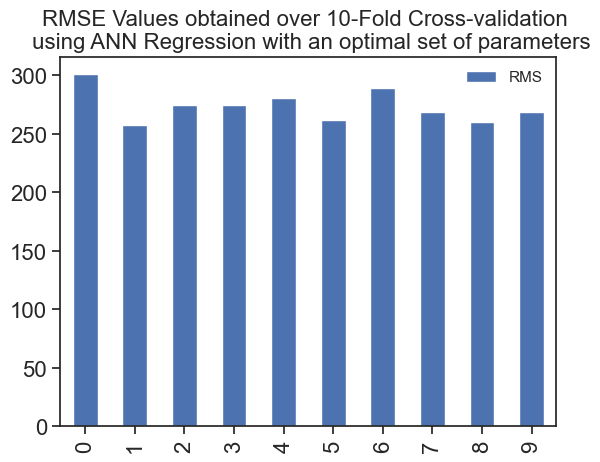

In [116]:
from sklearn.model_selection import cross_val_score

# Create an MLPRegressor object and set the hyperparameters
ann = MLPRegressor(hidden_layer_sizes=(150, 150), max_iter=50, random_state=32)

# Compute cross-validation scores
rmse = -cross_val_score(ann, X_train, Y_train, scoring="neg_root_mean_squared_error", cv=10)

new_data_ann_scores = pd.DataFrame(rmse, columns = ['RMS'])
new_data_ann_scores.plot(kind = 'bar')
plt.title('RMSE Values obtained over 10-Fold Cross-validation \n using ANN Regression with an optimal set of parameters', fontsize = 16)

### Apply Best Hyperparameter to the Test Data

In [117]:
ann = MLPRegressor(hidden_layer_sizes=(150, 150), max_iter=50, random_state=32)

ann.fit(X_train, Y_train) 

# Compute training R2
training_R2 = ann.score(X_train, Y_train) 

In [118]:
# Make prediction using test data
Y_pred = ann.predict(X_test)  

# Compute test R2
test_R2 = ann.score(X_test, Y_test)    


Text(0.5, 1.0, 'Training R2 = 0.89  Test R2 = 0.88')

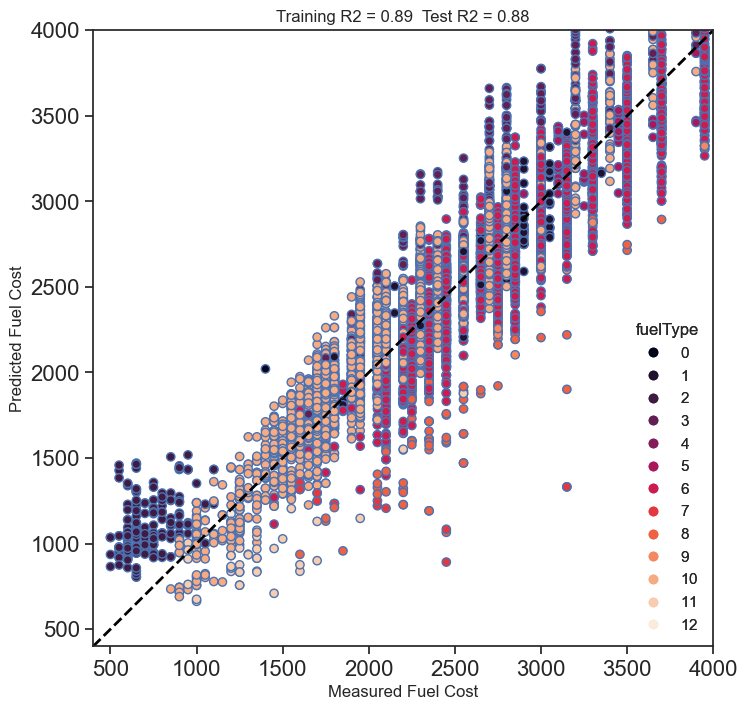

In [119]:
# Create a series of plots for predicted versus actual fuel cost
fig = plt.figure(figsize=(8, 8))
plt.axis([400, 4000, 400, 4000])
plt.scatter(Y_test, Y_pred, c=X_test['fuelType'], edgecolor = 'b')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="fuelType")
plt.gca().add_artist(legend1)

plt.plot([400, 4000],[400, 4000], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted Fuel Cost') 
plt.xlabel('Measured Fuel Cost') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

#### Comments

The models above performed well with decision tree performing the best and KNN performing the least after cross validation. 

The RMSE Values obtained over 10-Fold Cross-validation using RF, DT and ANN Regression with an optimal set of parameters seems to have the first fold quite higher than the others
I would consider startifying by the categorical variable with the highest feature importance and see if get something different and better. ( I would be doing the stratification in a different note book)